In [131]:
# Import required libraries:
import numpy as np# Define input features:
from numpy import random
from IPython.display import clear_output

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import os
from bioinfokit.analys import stat

import math

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd

from numpy import linalg as LA

import datetime
from datetime import timedelta
#from datetime import datetime
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar


from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import linregress

import researchpy as rp
import scipy.stats as stats

pd.set_option('display.max_columns', None)
pd.set_option("max_rows", 150)

def vin(x):
    y = np.sum(x in locals()) + np.sum(x in globals())
    return "not defined in env" if y == 0 else "already defined in env"


def v():
  print()
  return None

#import googlemaps

#import geopy
#import geopy.distance

#%load_ext google.colab.data_table
#%unload_ext google.colab.data_table

print("\n [[IMPORT OK]]")


 [[IMPORT OK]]


In [132]:
!pwd

/media/aryavish/2b90cef8-3b3a-4a3b-88e6-33ceb8e69057/aryavish/gdrive_v/Capcelona/Deals/Bus Dev/coursera review crap/math review/GMU Dept of Math/OR 635 simulation/hw/proj/final pres/submit_fin


In [133]:
# read in

#os.getcwd()

df1 = pd.read_csv("201904-capitalbikeshare-tripdata.csv")
df2 = pd.read_csv("201905-capitalbikeshare-tripdata.csv")
df3 = pd.read_csv("201906-capitalbikeshare-tripdata.csv")

vtot = [df1,df2,df3]

df = pd.concat(vtot)

In [134]:
df.index
df.shape
df.head()

df.isnull().sum() # significnt Nans
df.shape[0]
df.isnull().sum() / df.shape[0] # given low % of data, suggest removing all Nan rows
df.dtypes

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            350134, 350135, 350136, 350137, 350138, 350139, 350140, 350141,
            350142, 350143],
           dtype='int64', length=1035840)

(1035840, 9)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,313,2019-04-01 00:03:03,2019-04-01 00:08:16,31618,4th & East Capitol St NE,31630,15th & East Capitol St NE,W24063,Member
1,453,2019-04-01 00:07:37,2019-04-01 00:15:10,31119,14th & Belmont St NW,31298,15th & M St NW,W22080,Member
2,333,2019-04-01 00:09:31,2019-04-01 00:15:05,31203,14th & Rhode Island Ave NW,31519,1st & O St NW,W00276,Member
3,568,2019-04-01 00:10:20,2019-04-01 00:19:49,31202,14th & R St NW,31103,16th & Harvard St NW,W21582,Member
4,1609,2019-04-01 00:10:38,2019-04-01 00:37:28,31517,Union Market,31655,New Jersey Ave & F St NW,75558,Member


Duration                 0
Start date               0
End date                 0
Start station number     0
Start station            0
End station number       0
End station              0
Bike number             14
Member type              0
dtype: int64

1035840

Duration                0.000000
Start date              0.000000
End date                0.000000
Start station number    0.000000
Start station           0.000000
End station number      0.000000
End station             0.000000
Bike number             0.000014
Member type             0.000000
dtype: float64

Duration                 int64
Start date              object
End date                object
Start station number     int64
Start station           object
End station number       int64
End station             object
Bike number             object
Member type             object
dtype: object

In [135]:
#drop NAs, negliglbe to data

df = df.dropna() # removes all Nan rows
df.isnull().sum()

Duration                0
Start date              0
End date                0
Start station number    0
Start station           0
End station number      0
End station             0
Bike number             0
Member type             0
dtype: int64

In [136]:
## note data excludes bike type, OK can pull from 2Q20 data to adjust for periodicity
df.head(20)
list(df)
df.shape

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,313,2019-04-01 00:03:03,2019-04-01 00:08:16,31618,4th & East Capitol St NE,31630,15th & East Capitol St NE,W24063,Member
1,453,2019-04-01 00:07:37,2019-04-01 00:15:10,31119,14th & Belmont St NW,31298,15th & M St NW,W22080,Member
2,333,2019-04-01 00:09:31,2019-04-01 00:15:05,31203,14th & Rhode Island Ave NW,31519,1st & O St NW,W00276,Member
3,568,2019-04-01 00:10:20,2019-04-01 00:19:49,31202,14th & R St NW,31103,16th & Harvard St NW,W21582,Member
4,1609,2019-04-01 00:10:38,2019-04-01 00:37:28,31517,Union Market,31655,New Jersey Ave & F St NW,75558,Member
5,356,2019-04-01 00:10:45,2019-04-01 00:16:42,31232,7th & F St NW / National Portrait Gallery,31294,7th & E St SW,W20136,Member
6,244,2019-04-01 00:11:21,2019-04-01 00:15:26,31200,Massachusetts Ave & Dupont Circle NW,31298,15th & M St NW,W21387,Member
7,1156,2019-04-01 00:13:00,2019-04-01 00:32:16,31522,2nd St & Seaton Pl NE,31406,14th & Upshur St NW,78364,Member
8,183,2019-04-01 00:21:22,2019-04-01 00:24:25,31246,M St & Pennsylvania Ave NW,31275,New Hampshire Ave & 24th St NW,W00110,Member
9,322,2019-04-01 00:22:51,2019-04-01 00:28:13,31623,Columbus Circle / Union Station,31647,7th St & Massachusetts Ave NE,W01396,Member


['Duration',
 'Start date',
 'End date',
 'Start station number',
 'Start station',
 'End station number',
 'End station',
 'Bike number',
 'Member type']

(1035826, 9)

In [137]:
#df.member_casual = df.member_casual.apply(str)
#data preprocessing

df['memc']=df['Member type'].apply(lambda x: 1 if x == "Member" else 0)
df['casc']=df['Member type'].apply(lambda x: 1 if x == "Casual" else 0)
#df['ebike']=df['rideable_type'].apply(lambda x: 1 if x == "electric_bike" else 0)
#df['pedal']=df['rideable_type'].apply(lambda x: 1 if x == "docked_bike" else 0)


df['Start date'] = pd.to_datetime(df['Start date'])
df['End date'] = pd.to_datetime(df['End date'])

In [138]:
df['startday'] = [d.date() for d in df['Start date']]
df['starttime'] = [d.time() for d in df['Start date']]

df['endday'] = [d.date() for d in df['End date']]
df['endtime'] = [d.time() for d in df['End date']]

df['arc'] = df["Start station number"].astype(str)+"-"+df["End station number"].astype(str)

In [139]:
df.head(); df.shape

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,memc,casc,startday,starttime,endday,endtime,arc
0,313,2019-04-01 00:03:03,2019-04-01 00:08:16,31618,4th & East Capitol St NE,31630,15th & East Capitol St NE,W24063,Member,1,0,2019-04-01,00:03:03,2019-04-01,00:08:16,31618-31630
1,453,2019-04-01 00:07:37,2019-04-01 00:15:10,31119,14th & Belmont St NW,31298,15th & M St NW,W22080,Member,1,0,2019-04-01,00:07:37,2019-04-01,00:15:10,31119-31298
2,333,2019-04-01 00:09:31,2019-04-01 00:15:05,31203,14th & Rhode Island Ave NW,31519,1st & O St NW,W00276,Member,1,0,2019-04-01,00:09:31,2019-04-01,00:15:05,31203-31519
3,568,2019-04-01 00:10:20,2019-04-01 00:19:49,31202,14th & R St NW,31103,16th & Harvard St NW,W21582,Member,1,0,2019-04-01,00:10:20,2019-04-01,00:19:49,31202-31103
4,1609,2019-04-01 00:10:38,2019-04-01 00:37:28,31517,Union Market,31655,New Jersey Ave & F St NW,75558,Member,1,0,2019-04-01,00:10:38,2019-04-01,00:37:28,31517-31655


(1035826, 16)

In [140]:
nodes = [31296,
31104,
31113,
31114,
31116,
31110,]

df['startyes'] = df['Start station number'].apply(lambda x: 1 if x in nodes else 0)
df['endyes'] = df['End station number'].apply(lambda x: 1 if x in nodes else 0)

In [141]:
##take only weekdays, remove holidays from df

dr = pd.date_range(start='2019-04-01', end='2019-07-01')

cal = calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())

df['Holiday'] = df['Start date'].isin(holidays) #boolean

df['weekday'] = df['Start date'].dt.dayofweek # only include Mon-Fri == 0-4

np.unique(df.Holiday) # no holidays

df = df.loc[df.weekday <= 4] # get only weekdays

array([False])

In [142]:
df # data from [4/1/19,6/30/19]

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,memc,casc,startday,starttime,endday,endtime,arc,startyes,endyes,Holiday,weekday
0,313,2019-04-01 00:03:03,2019-04-01 00:08:16,31618,4th & East Capitol St NE,31630,15th & East Capitol St NE,W24063,Member,1,0,2019-04-01,00:03:03,2019-04-01,00:08:16,31618-31630,0,0,False,0
1,453,2019-04-01 00:07:37,2019-04-01 00:15:10,31119,14th & Belmont St NW,31298,15th & M St NW,W22080,Member,1,0,2019-04-01,00:07:37,2019-04-01,00:15:10,31119-31298,0,0,False,0
2,333,2019-04-01 00:09:31,2019-04-01 00:15:05,31203,14th & Rhode Island Ave NW,31519,1st & O St NW,W00276,Member,1,0,2019-04-01,00:09:31,2019-04-01,00:15:05,31203-31519,0,0,False,0
3,568,2019-04-01 00:10:20,2019-04-01 00:19:49,31202,14th & R St NW,31103,16th & Harvard St NW,W21582,Member,1,0,2019-04-01,00:10:20,2019-04-01,00:19:49,31202-31103,0,0,False,0
4,1609,2019-04-01 00:10:38,2019-04-01 00:37:28,31517,Union Market,31655,New Jersey Ave & F St NW,75558,Member,1,0,2019-04-01,00:10:38,2019-04-01,00:37:28,31517-31655,0,0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328669,429,2019-06-28 23:59:07,2019-06-29 00:06:17,31611,13th & H St NE,31626,15th St & Massachusetts Ave SE,W23532,Member,1,0,2019-06-28,23:59:07,2019-06-29,00:06:17,31611-31626,0,0,False,4
328670,336,2019-06-28 23:59:26,2019-06-29 00:05:03,31285,22nd & P ST NW,31237,25th St & Pennsylvania Ave NW,W00058,Member,1,0,2019-06-28,23:59:26,2019-06-29,00:05:03,31285-31237,0,0,False,4
328671,1076,2019-06-28 23:59:32,2019-06-29 00:17:28,31114,18th St & Wyoming Ave NW,31275,New Hampshire Ave & 24th St NW,W00639,Member,1,0,2019-06-28,23:59:32,2019-06-29,00:17:28,31114-31275,1,0,False,4
328672,389,2019-06-28 23:59:50,2019-06-29 00:06:19,31241,Thomas Circle,31267,17th St & Massachusetts Ave NW,W21418,Member,1,0,2019-06-28,23:59:50,2019-06-29,00:06:19,31241-31267,0,0,False,4


In [143]:
## validation only, select 1 date contains [start,end] (start,end] and [start,end)

df[((df.startyes == 1) & (df.endyes == 1)) | ((df.startyes == 0) & (df.endyes == 1)) | ((df.startyes == 1) & (df.endyes == 0))]\
.groupby("startday").agg(numrides = ('Duration','count'))

#select Tuesday 4/9/2019
valdate = datetime.date(2019,6,26)

dfval = df[((df.startyes == 1) & (df.endyes == 1)) | ((df.startyes == 0) & (df.endyes == 1)) | ((df.startyes == 1) & (df.endyes == 0))]

dfval = dfval[dfval.startday == valdate] # contains single date of rides from valdate

dfval.reset_index(level=0, inplace=True)
dfval.drop(columns="index", inplace=True)

dfval.to_csv("dfval"+str(valdate)+".csv",header=True,index=False)




,numrides
startday,
2019-04-01,487
2019-04-02,427
2019-04-03,607
2019-04-04,624
2019-04-05,407
2019-04-08,522
2019-04-09,662
2019-04-10,659
2019-04-11,619


In [144]:
#prepare actual lists to feed simulation using actual arrival times

val_customer_startinendin, val_customer_startinendout, val_customer_startoutendin = [],[],[]

numcust = 1

#start IN end IN
for x in range(dfval.shape[0]):
    if dfval.loc[dfval.index == x,'startyes'].iloc[0] == 1 \
    and dfval.loc[dfval.index == x,'endyes'].iloc[0] == 1:
        val_customer_startinendin.append((numcust, dfval.loc[dfval.index == x,'starttime'].iloc[0]))
        numcust += 1

#start IN end OUT
numcust = 1
for x in range(dfval.shape[0]):
    if dfval.loc[dfval.index == x,'startyes'].iloc[0] == 1 \
    and dfval.loc[dfval.index == x,'endyes'].iloc[0] == 0:
        val_customer_startinendout.append((numcust, dfval.loc[dfval.index == x,'starttime'].iloc[0]))
        numcust += 1

        
#start OUT end IN
numcust = 1
for x in range(dfval.shape[0]):
    if dfval.loc[dfval.index == x,'startyes'].iloc[0] == 0 \
    and dfval.loc[dfval.index == x,'endyes'].iloc[0] == 1:
        val_customer_startoutendin.append((numcust, dfval.loc[dfval.index == x,'starttime'].iloc[0]))
        numcust += 1

#truncate to minutes in [1,1440] time
val_customer_startinendin = [(val_customer_startinendin[x][0], \
  val_customer_startinendin[x][1].hour*60 + val_customer_startinendin[x][1].minute) \
 for x in range(len(val_customer_startinendin))]

val_customer_startinendout = [(val_customer_startinendout[x][0], \
  val_customer_startinendout[x][1].hour*60 + val_customer_startinendout[x][1].minute) \
 for x in range(len(val_customer_startinendout))]

val_customer_startoutendin = [(val_customer_startoutendin[x][0], \
  val_customer_startoutendin[x][1].hour*60 + val_customer_startoutendin[x][1].minute) \
 for x in range(len(val_customer_startoutendin))]


#export to csv for validation testing

val_startinendin_name = str(valdate)+"startinendin.csv"
val_startinendout_name = str(valdate)+"startinendout.csv"
val_startoutendin_name = str(valdate)+"startoutendin.csv"

pd.DataFrame(val_customer_startinendin).to_csv(val_startinendin_name, header=False,index=False)

pd.DataFrame(val_customer_startinendout).to_csv(val_startinendout_name, header=False,index=False)

pd.DataFrame(val_customer_startoutendin).to_csv(val_startoutendin_name, header=False,index=False)


In [145]:
## capture all [start node] | start in system

#'temp1' in locals()

dfstartenddiff = df[df.startyes == 1][['Duration','Start station number','startday','startyes','endyes']]

#if start in system AND end not in ssytem == 1, else 0
dfstartenddiff['leavecount'] = dfstartenddiff.apply(lambda x: 0 if x.startyes == 1 & x.endyes == 1 else 1, axis=1)

In [146]:
dfstartenddiff

,Duration,Start station number,startday,startyes,endyes,leavecount
26,419,31110,2019-04-01,1,0,1
41,245,31296,2019-04-01,1,0,1
78,478,31110,2019-04-01,1,0,1
105,658,31113,2019-04-01,1,0,1
128,338,31104,2019-04-01,1,0,1
...,...,...,...,...,...,...
328622,1045,31113,2019-06-28,1,1,0
328632,526,31114,2019-06-28,1,0,1
328658,334,31110,2019-06-28,1,0,1
328663,440,31104,2019-06-28,1,0,1


In [147]:
dfstartenddiff.groupby('startday').agg(vcount = ('leavecount','sum')).describe() ## distro daily departs

,vcount
count,65.000000
mean,303.753846
std,39.631518
min,204.000000
25%,277.000000
50%,315.000000
75%,329.000000
max,375.000000


In [148]:
## probability of leaving system is independent RV

dfstartenddiff.leavecount.sum() / dfstartenddiff.shape[0]

0.9295668549905838

In [149]:
#breakdown end in system or outside by station node

#analysis indicates overall leave rate of 92% overall the same across nodes, need to simulate the [start,end) as
#separate entity below

dfstartenddiff.groupby('Start station number').agg(vtotal = ('startyes','sum'), vleave = ('leavecount','sum'))

,vtotal,vleave
Start station number,,
31104,3720,3472
31110,4697,4407
31113,2729,2477
31114,3881,3618
31116,2759,2599
31296,3454,3171


In [150]:
'dfstend' in locals()
'dfstend' in globals()

True

True

In [151]:
# new entity for [start, end) | enters into the system but EXITS the system to a different node and takes resource
# at specific bike starting node

dfstend = df[(df.startyes == 1) & (df.endyes == 0)]

dfstend

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,memc,casc,startday,starttime,endday,endtime,arc,startyes,endyes,Holiday,weekday
26,419,2019-04-01 01:23:01,2019-04-01 01:30:00,31110,20th St & Florida Ave NW,31275,New Hampshire Ave & 24th St NW,W20426,Member,1,0,2019-04-01,01:23:01,2019-04-01,01:30:00,31110-31275,1,0,False,0
41,245,2019-04-01 04:30:02,2019-04-01 04:34:07,31296,Columbia & Ontario Rd NW,31200,Massachusetts Ave & Dupont Circle NW,W23744,Member,1,0,2019-04-01,04:30:02,2019-04-01,04:34:07,31296-31200,1,0,False,0
78,478,2019-04-01 05:21:27,2019-04-01 05:29:26,31110,20th St & Florida Ave NW,31205,21st & I St NW,W20398,Member,1,0,2019-04-01,05:21:27,2019-04-01,05:29:26,31110-31205,1,0,False,0
105,658,2019-04-01 05:44:41,2019-04-01 05:55:39,31113,Columbia Rd & Belmont St NW,31275,New Hampshire Ave & 24th St NW,W01226,Member,1,0,2019-04-01,05:44:41,2019-04-01,05:55:39,31113-31275,1,0,False,0
128,338,2019-04-01 05:52:33,2019-04-01 05:58:12,31104,Adams Mill & Columbia Rd NW,31268,12th & U St NW,W23992,Member,1,0,2019-04-01,05:52:33,2019-04-01,05:58:12,31104-31268,1,0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328582,478,2019-06-28 23:34:15,2019-06-28 23:42:14,31104,Adams Mill & Columbia Rd NW,31299,Connecticut Ave & R St NW,W23221,Member,1,0,2019-06-28,23:34:15,2019-06-28,23:42:14,31104-31299,1,0,False,4
328632,526,2019-06-28 23:46:01,2019-06-28 23:54:47,31114,18th St & Wyoming Ave NW,31285,22nd & P ST NW,W24224,Member,1,0,2019-06-28,23:46:01,2019-06-28,23:54:47,31114-31285,1,0,False,4
328658,334,2019-06-28 23:56:50,2019-06-29 00:02:24,31110,20th St & Florida Ave NW,31323,Woodley Park Metro / Calvert St & Connecticut ...,W20345,Member,1,0,2019-06-28,23:56:50,2019-06-29,00:02:24,31110-31323,1,0,False,4
328663,440,2019-06-28 23:57:46,2019-06-29 00:05:06,31104,Adams Mill & Columbia Rd NW,31126,11th & Girard St NW,W01369,Member,1,0,2019-06-28,23:57:46,2019-06-29,00:05:06,31104-31126,1,0,False,4


In [152]:
## distribution of daily arrivals

#average arrivals are 303 per day
dfstend.groupby('startday').agg(vcount = ('Duration','count'))

(dfstend.groupby('startday').agg(vcount = ('Duration','count'))).describe()


,vcount
startday,
2019-04-01,233
2019-04-02,234
2019-04-03,321
2019-04-04,321
2019-04-05,204
2019-04-08,266
2019-04-09,336
2019-04-10,337
2019-04-11,325


,vcount
count,65.000000
mean,303.753846
std,39.631518
min,204.000000
25%,277.000000
50%,315.000000
75%,329.000000
max,375.000000


In [153]:
##pmf of starting station for [start,end)

dfstend.groupby('Start station number').agg(vcount = ('Duration','count')) / dfstend.shape[0]

(dfstend.groupby('Start station number').agg(vcount = ('Duration','count')) / dfstend.shape[0]).sum()

,vcount
Start station number,
31104,0.175851
31110,0.223207
31113,0.125456
31114,0.183246
31116,0.131635
31296,0.160606


vcount    1.0
dtype: float64

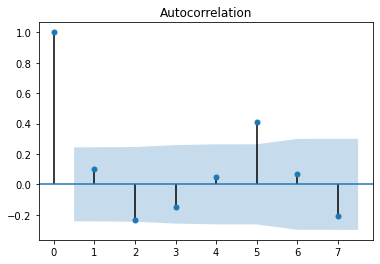

,vcount
weekday,
0,3356
1,3842
2,4248
3,4217
4,4081


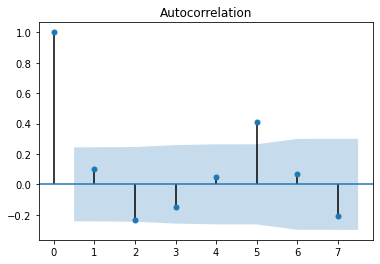

In [154]:
plot_acf(dfstend.groupby('startday').agg(vc = ('Duration','count')).vc, lags=7)

##autocorrelation indicates not indepedent data, high correlation lag = 5

#groupby weekday that has highest count and use that for simulation purposes

dfstend.groupby('weekday').agg(vcount = ('Duration','count')) #2 == Wednesday will be selected

In [155]:
dfstend = dfstend[dfstend.weekday == 2]

dfstend['starthour'] = [d.time().hour for d in dfstend['Start date']]

dfstend

<ipython-input-155-04ebfcb559df>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstend['starthour'] = [d.time().hour for d in dfstend['Start date']]


,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,memc,casc,startday,starttime,endday,endtime,arc,startyes,endyes,Holiday,weekday,starthour
16793,146,2019-04-03 01:52:22,2019-04-03 01:54:49,31110,20th St & Florida Ave NW,31278,18th & R St NW,W00583,Member,1,0,2019-04-03,01:52:22,2019-04-03,01:54:49,31110-31278,1,0,False,2,1
16826,811,2019-04-03 05:02:36,2019-04-03 05:16:07,31296,Columbia & Ontario Rd NW,31314,34th & Water St NW,W20044,Member,1,0,2019-04-03,05:02:36,2019-04-03,05:16:07,31296-31314,1,0,False,2,5
16852,395,2019-04-03 05:30:35,2019-04-03 05:37:11,31110,20th St & Florida Ave NW,31257,22nd & I St NW / Foggy Bottom,W23219,Member,1,0,2019-04-03,05:30:35,2019-04-03,05:37:11,31110-31257,1,0,False,2,5
16867,476,2019-04-03 05:42:09,2019-04-03 05:50:06,31113,Columbia Rd & Belmont St NW,31275,New Hampshire Ave & 24th St NW,E00109,Member,1,0,2019-04-03,05:42:09,2019-04-03,05:50:06,31113-31275,1,0,False,2,5
16888,475,2019-04-03 05:49:37,2019-04-03 05:57:32,31296,Columbia & Ontario Rd NW,31212,21st & M St NW,78174,Member,1,0,2019-04-03,05:49:37,2019-04-03,05:57:32,31296-31212,1,0,False,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305331,270,2019-06-26 23:13:00,2019-06-26 23:17:31,31110,20th St & Florida Ave NW,31323,Woodley Park Metro / Calvert St & Connecticut ...,W21904,Member,1,0,2019-06-26,23:13:00,2019-06-26,23:17:31,31110-31323,1,0,False,2,23
305348,579,2019-06-26 23:18:04,2019-06-26 23:27:44,31104,Adams Mill & Columbia Rd NW,31202,14th & R St NW,W01434,Member,1,0,2019-06-26,23:18:04,2019-06-26,23:27:44,31104-31202,1,0,False,2,23
305369,821,2019-06-26 23:24:32,2019-06-26 23:38:13,31116,California St & Florida Ave NW,31651,11th & Park Rd NW,W01221,Casual,0,1,2019-06-26,23:24:32,2019-06-26,23:38:13,31116-31651,1,0,False,2,23
305395,552,2019-06-26 23:31:59,2019-06-26 23:41:12,31114,18th St & Wyoming Ave NW,31266,11th & M St NW,W21266,Member,1,0,2019-06-26,23:31:59,2019-06-26,23:41:12,31114-31266,1,0,False,2,23


In [156]:
dfstendhour = dfstend.groupby(['starthour','startday']).agg(count = ('starthour','count'))

dfstendhour.reset_index(level=0, inplace=True)
dfstendhour.reset_index(level=0, inplace=True)

dfstendhour = dfstendhour.groupby('starthour').agg(vmean = ('count','mean'))

dfstendhour 

dfstendhour.sum()

,vmean
starthour,
0,2.818182
1,2.250000
2,1.142857
3,1.000000
4,1.166667
5,6.461538
6,16.153846
7,38.076923
8,47.615385


vmean    329.223859
dtype: float64

<Figure size 1080x1080 with 0 Axes>

([<matplotlib.axis.XTick at 0x7f7354280f10>,
 <a list of 24 Text major ticklabel objects>)

Text(0, 0.5, 'Bike Arrivals, Total')

Text(0.5, 0, 'Hour in Day')

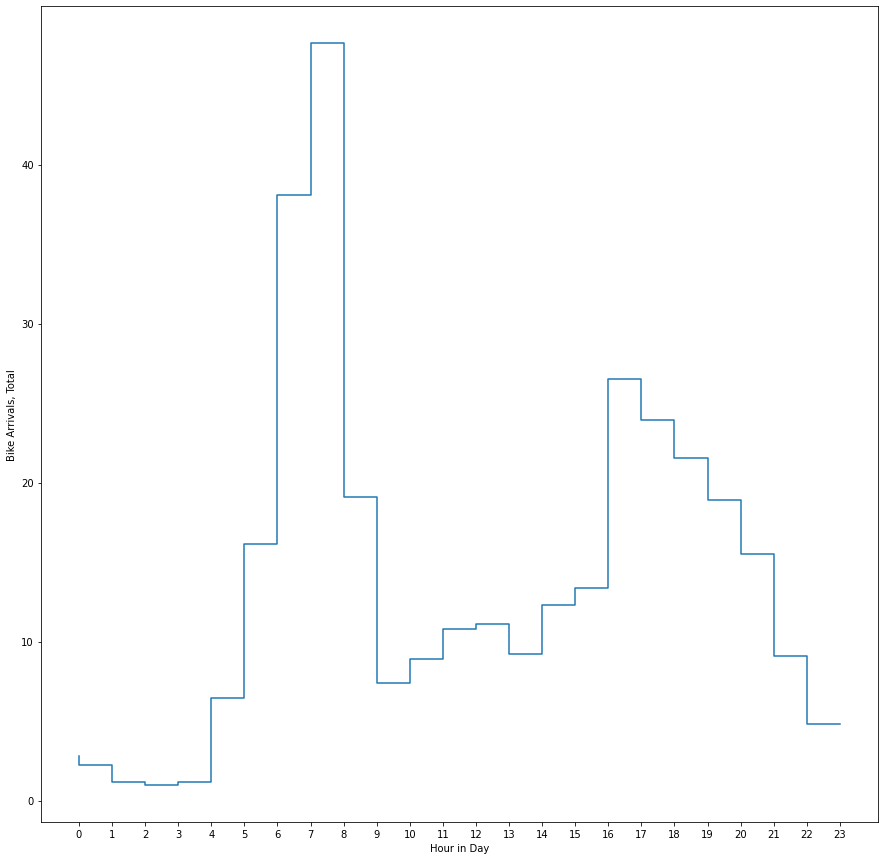

In [157]:
#PLOT FOR START IN END OUT

plt.figure(figsize=(15,15))
plt.step(dfstendhour.index,dfstendhour.vmean)
plt.xticks(np.arange(0, 24, 1.0))
plt.ylabel("Bike Arrivals, Total")
plt.xlabel("Hour in Day")

In [158]:
#adjusted poissons based on avg lambdas from graph to smooth out arrival rates to match 303/day
tempp = [1,1,1,1,1,6.461538,16.153846,38.076923,38.076923,19.076923,7.384615,7.384615,7.384615,7.384615,7.384615,12.307692,13.384615,26.538462,23.923077,21.538462,18.923077,15.538462,9.076923,4.89]


dfstendhour_adj = pd.DataFrame((list(np.arange(0,24,1)),tempp)).T

dfstendhour_adj.columns = ["hour", "lambdaperhr"]

dfstendhour_adj['loglambda'] = dfstendhour_adj.lambdaperhr.apply(lambda x: np.log(x))

dfstendhour_adj

dfstendhour_adj.sum()



,hour,lambdaperhr,loglambda
0,0.0,1.000000,0.000000
1,1.0,1.000000,0.000000
2,2.0,1.000000,0.000000
3,3.0,1.000000,0.000000
4,4.0,1.000000,0.000000
5,5.0,6.461538,1.865867
6,6.0,16.153846,2.782158
7,7.0,38.076923,3.639608
8,8.0,38.076923,3.639608
9,9.0,19.076923,2.948479


hour           276.000000
lambdaperhr    305.889998
loglambda       48.976953
dtype: float64

In [159]:
## generate ALL t* under maxlambda in 24 hr period and then thin
maxlambda = np.max(dfstendhour_adj.lambdaperhr)


#generate first customer arrival
u1 = random.uniform(0,1)
lambda0 = dfstendhour_adj.iloc[0,1]
cust1 = -1/lambda0*np.log(u1)

vtime = cust1

cust_total = []

cust_total.append(vtime)

while vtime < 24:
    u1 = random.uniform(0,1)
    vtime = vtime - (1/maxlambda)*np.log(u1)
    cust_total.append(vtime)
    if len(cust_total) > 1000: 
        break



cust_total.pop(-1) #pop inplace=True by default

len(cust_total)


24.051759644407987

840

In [160]:
cust_ftotal = []
customer_times1 = []

ncust = 1

#thin arrival times here
for x in range(len(cust_total)):
    u2 = random.uniform(0,1)
    tlambda = np.floor(cust_total[x])
    tlambda = dfstendhour_adj.loc[dfstendhour_adj.hour == tlambda,'lambdaperhr'].iloc[0]
    if u2 <= tlambda / maxlambda:
        cust_ftotal.append(cust_total[x])
        customer_times1.append((ncust, cust_total[x]))
        ncust +=1

cust_ftotal = pd.DataFrame(cust_ftotal)
cust_ftotal.columns = ["arrival_time"]
cust_ftotal['arrhour'] = cust_ftotal.arrival_time.apply(lambda x: np.floor(x))

##print list
cust_ftotal.groupby('arrhour').agg(vcount = ('arrhour','count'))
(cust_ftotal.groupby('arrhour').agg(vcount = ('arrhour','count'))).sum()

customer_times1

,vcount
arrhour,
2.0,2
4.0,2
5.0,11
6.0,7
7.0,40
8.0,44
9.0,16
10.0,9
11.0,12


vcount    303
dtype: int64

[(1, 2.173427583476646),
 (2, 2.6629986617629497),
 (3, 4.3108555094109455),
 (4, 4.952747565376676),
 (5, 5.065817164067756),
 (6, 5.192574586349872),
 (7, 5.344777421800387),
 (8, 5.410506849903592),
 (9, 5.5726054583093845),
 (10, 5.650688018840644),
 (11, 5.691516658838347),
 (12, 5.693349521512313),
 (13, 5.8237853024670345),
 (14, 5.920285196155776),
 (15, 5.98092194031285),
 (16, 6.011318140717059),
 (17, 6.0924032859572455),
 (18, 6.184953163950748),
 (19, 6.187658569438887),
 (20, 6.35315669996172),
 (21, 6.703354577845175),
 (22, 6.8522741148821025),
 (23, 7.029165304829367),
 (24, 7.056587965421687),
 (25, 7.057719446557758),
 (26, 7.111732297968411),
 (27, 7.181871881213201),
 (28, 7.185498637590915),
 (29, 7.189161179419),
 (30, 7.19408704089576),
 (31, 7.202893138244657),
 (32, 7.211300265941614),
 (33, 7.2207982740751895),
 (34, 7.2885173182560266),
 (35, 7.350990166298016),
 (36, 7.403906596959635),
 (37, 7.404946644640114),
 (38, 7.430732094409704),
 (39, 7.44124466123

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,memc,casc,startday,starttime,endday,endtime,arc,startyes,endyes,Holiday,weekday
114,316,2019-04-01 05:48:05,2019-04-01 05:53:21,31105,14th & Harvard St NW,31113,Columbia Rd & Belmont St NW,W00993,Member,1,0,2019-04-01,05:48:05,2019-04-01,05:53:21,31105-31113,0,1,False,0
115,266,2019-04-01 05:48:16,2019-04-01 05:52:42,31282,16th & R St NW,31110,20th St & Florida Ave NW,W22632,Member,1,0,2019-04-01,05:48:16,2019-04-01,05:52:42,31282-31110,0,1,False,0
153,293,2019-04-01 06:05:53,2019-04-01 06:10:47,31103,16th & Harvard St NW,31110,20th St & Florida Ave NW,W00755,Member,1,0,2019-04-01,06:05:53,2019-04-01,06:10:47,31103-31110,0,1,False,0
215,597,2019-04-01 06:22:03,2019-04-01 06:32:00,31241,Thomas Circle,31116,California St & Florida Ave NW,W01186,Member,1,0,2019-04-01,06:22:03,2019-04-01,06:32:00,31241-31116,0,1,False,0
274,270,2019-04-01 06:37:50,2019-04-01 06:42:21,31278,18th & R St NW,31114,18th St & Wyoming Ave NW,W23990,Member,1,0,2019-04-01,06:37:50,2019-04-01,06:42:21,31278-31114,0,1,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328561,1870,2019-06-28 23:27:30,2019-06-28 23:58:40,31107,Lamont & Mt Pleasant NW,31104,Adams Mill & Columbia Rd NW,W23947,Member,1,0,2019-06-28,23:27:30,2019-06-28,23:58:40,31107-31104,0,1,False,4
328598,160,2019-06-28 23:37:27,2019-06-28 23:40:08,31121,Calvert St & Woodley Pl NW,31104,Adams Mill & Columbia Rd NW,W22407,Member,1,0,2019-06-28,23:37:27,2019-06-28,23:40:08,31121-31104,0,1,False,4
328609,279,2019-06-28 23:40:30,2019-06-28 23:45:10,31229,New Hampshire Ave & T St NW,31113,Columbia Rd & Belmont St NW,W22874,Member,1,0,2019-06-28,23:40:30,2019-06-28,23:45:10,31229-31113,0,1,False,4
328644,272,2019-06-28 23:50:12,2019-06-28 23:54:45,31122,16th & Irving St NW,31296,Columbia & Ontario Rd NW,W20788,Member,1,0,2019-06-28,23:50:12,2019-06-28,23:54:45,31122-31296,0,1,False,4


,vcount
startday,
2019-04-01,216
2019-04-02,179
2019-04-03,273
2019-04-04,276
2019-04-05,181
2019-04-08,230
2019-04-09,302
2019-04-10,296
2019-04-11,275


,vcount
count,65.000000
mean,255.953846
std,32.965622
min,178.000000
25%,238.000000
50%,267.000000
75%,276.000000
max,302.000000


,vcount
End station number,
31104,0.186272
31110,0.254794
31113,0.081866
31114,0.177496
31116,0.169502
31296,0.130072


vcount    1.0
dtype: float64

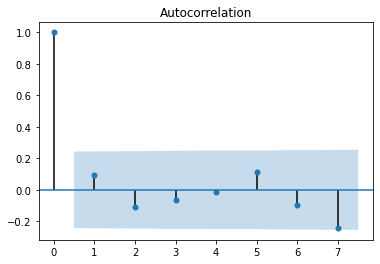

<ipython-input-161-1b524dc36bba>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstend['starthour'] = [d.time().hour for d in dfstend['Start date']]


,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,memc,casc,startday,starttime,endday,endtime,arc,startyes,endyes,Holiday,weekday,starthour
114,316,2019-04-01 05:48:05,2019-04-01 05:53:21,31105,14th & Harvard St NW,31113,Columbia Rd & Belmont St NW,W00993,Member,1,0,2019-04-01,05:48:05,2019-04-01,05:53:21,31105-31113,0,1,False,0,5
115,266,2019-04-01 05:48:16,2019-04-01 05:52:42,31282,16th & R St NW,31110,20th St & Florida Ave NW,W22632,Member,1,0,2019-04-01,05:48:16,2019-04-01,05:52:42,31282-31110,0,1,False,0,5
153,293,2019-04-01 06:05:53,2019-04-01 06:10:47,31103,16th & Harvard St NW,31110,20th St & Florida Ave NW,W00755,Member,1,0,2019-04-01,06:05:53,2019-04-01,06:10:47,31103-31110,0,1,False,0,6
215,597,2019-04-01 06:22:03,2019-04-01 06:32:00,31241,Thomas Circle,31116,California St & Florida Ave NW,W01186,Member,1,0,2019-04-01,06:22:03,2019-04-01,06:32:00,31241-31116,0,1,False,0,6
274,270,2019-04-01 06:37:50,2019-04-01 06:42:21,31278,18th & R St NW,31114,18th St & Wyoming Ave NW,W23990,Member,1,0,2019-04-01,06:37:50,2019-04-01,06:42:21,31278-31114,0,1,False,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328561,1870,2019-06-28 23:27:30,2019-06-28 23:58:40,31107,Lamont & Mt Pleasant NW,31104,Adams Mill & Columbia Rd NW,W23947,Member,1,0,2019-06-28,23:27:30,2019-06-28,23:58:40,31107-31104,0,1,False,4,23
328598,160,2019-06-28 23:37:27,2019-06-28 23:40:08,31121,Calvert St & Woodley Pl NW,31104,Adams Mill & Columbia Rd NW,W22407,Member,1,0,2019-06-28,23:37:27,2019-06-28,23:40:08,31121-31104,0,1,False,4,23
328609,279,2019-06-28 23:40:30,2019-06-28 23:45:10,31229,New Hampshire Ave & T St NW,31113,Columbia Rd & Belmont St NW,W22874,Member,1,0,2019-06-28,23:40:30,2019-06-28,23:45:10,31229-31113,0,1,False,4,23
328644,272,2019-06-28 23:50:12,2019-06-28 23:54:45,31122,16th & Irving St NW,31296,Columbia & Ontario Rd NW,W20788,Member,1,0,2019-06-28,23:50:12,2019-06-28,23:54:45,31122-31296,0,1,False,4,23


,vmean
starthour,
0,2.181818
1,1.703704
2,1.111111
3,1.000000
4,1.125000
5,2.678571
6,6.738462
7,8.246154
8,15.369231


vmean    260.528898
dtype: float64

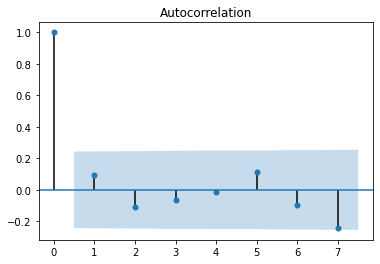

In [161]:
# new entity for (start, end] | starts outside system and ends IN SYSTEM
#################################################3


dfstend = df[(df.startyes == 0) & (df.endyes == 1)]

dfstend

## distribution of daily arrivals

#average arrivals are 303 per day
dfstend.groupby('startday').agg(vcount = ('Duration','count'))

(dfstend.groupby('startday').agg(vcount = ('Duration','count'))).describe()


##pmf of ending station

dfstend.groupby('End station number').agg(vcount = ('Duration','count')) / dfstend.shape[0]

(dfstend.groupby('End station number').agg(vcount = ('Duration','count')) / dfstend.shape[0]).sum()

plot_acf(dfstend.groupby('startday').agg(vc = ('Duration','count')).vc, lags=7)

##autocorrelation indicates not indepedent data, high correlation lag = 5

#groupby weekday that has highest count and use that for simulation purposes

dfstend['starthour'] = [d.time().hour for d in dfstend['Start date']]

dfstend

dfstendhour = dfstend.groupby(['starthour','startday']).agg(count = ('starthour','count'))

dfstendhour.reset_index(level=0, inplace=True)
dfstendhour.reset_index(level=0, inplace=True)

dfstendhour = dfstendhour.groupby('starthour').agg(vmean = ('count','mean'))

dfstendhour 

dfstendhour.sum()

In [162]:
dfstendhour

dfstendhour.sum()

,vmean
starthour,
0,2.181818
1,1.703704
2,1.111111
3,1.000000
4,1.125000
5,2.678571
6,6.738462
7,8.246154
8,15.369231


vmean    260.528898
dtype: float64

<Figure size 1080x1080 with 0 Axes>

([<matplotlib.axis.XTick at 0x7f7322fefd00>,
 <a list of 24 Text major ticklabel objects>)

Text(0, 0.5, 'Bike Arrivals, Total')

Text(0.5, 0, 'Hour in Day')

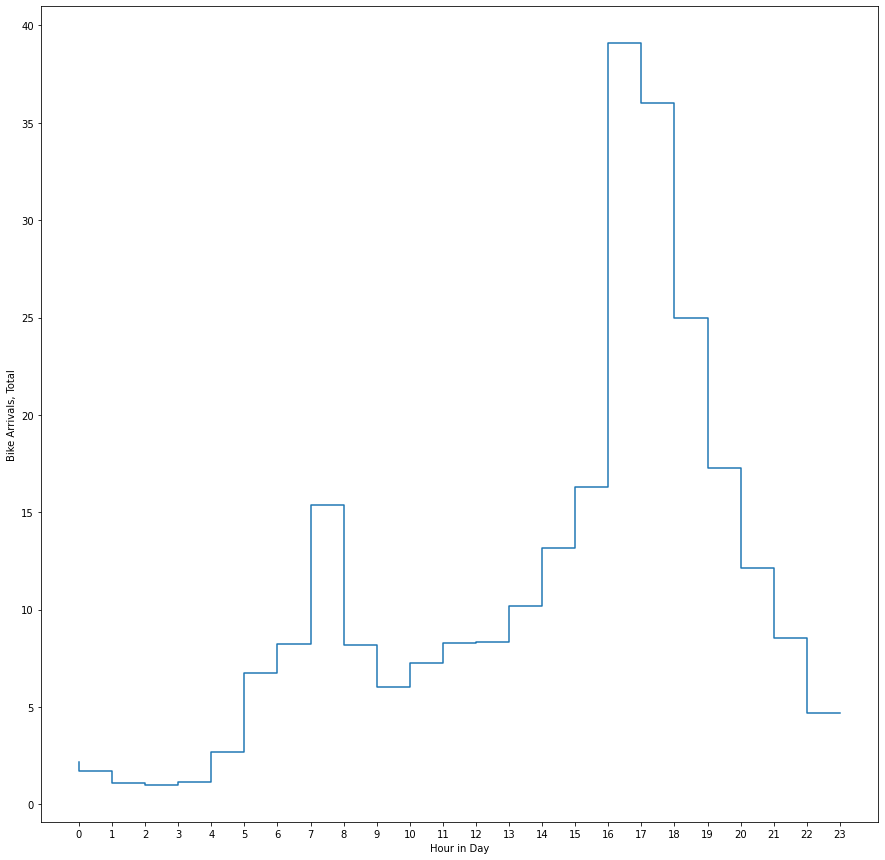

In [163]:
##PLOT FOR START OUT END IN

plt.figure(figsize=(15,15))
plt.step(dfstendhour.index,dfstendhour.vmean)
plt.xticks(np.arange(0, 24, 1.0))
plt.ylabel("Bike Arrivals, Total")
plt.xlabel("Hour in Day")

In [164]:
#thining algorithm commences here

#dfstendhour contains poisson arrivals per hr for (start,end]



## generate ALL t* under maxlambda in 24 hr period and then thin
maxlambda = np.max(dfstendhour.vmean)


#generate first customer arrival
u1 = random.uniform(0,1)
lambda0 = dfstendhour.iloc[0,0]
cust1 = -1/lambda0*np.log(u1)

vtime = cust1

cust_total = []

cust_total.append(vtime)

while vtime < 24:
    u1 = random.uniform(0,1)
    vtime = vtime - (1/maxlambda)*np.log(u1)
    cust_total.append(vtime)
    if len(cust_total) > 1000: 
        break



cust_total.pop(-1) #pop inplace=True by default

maxlambda; lambda0

len(cust_total)

24.07998124977081

39.07692307692308

2.1818181818181817

873

In [165]:
cust_ftotal = []
customer_times1 = []

ncust = 1

#thin arrival times here
for x in range(len(cust_total)):
    u2 = random.uniform(0,1)
    tlambda = np.floor(cust_total[x])
    tlambda = dfstendhour.loc[dfstendhour.index == tlambda,'vmean'].iloc[0]
    if u2 <= tlambda / maxlambda:
        cust_ftotal.append(cust_total[x])
        customer_times1.append((ncust, cust_total[x]))
        ncust +=1

cust_ftotal = pd.DataFrame(cust_ftotal)
cust_ftotal.columns = ["arrival_time"]
cust_ftotal['arrhour'] = cust_ftotal.arrival_time.apply(lambda x: np.floor(x))

##print list
cust_ftotal.groupby('arrhour').agg(vcount = ('arrhour','count'))
(cust_ftotal.groupby('arrhour').agg(vcount = ('arrhour','count'))).sum()

customer_times1

,vcount
arrhour,
0.0,1
1.0,1
2.0,1
3.0,1
4.0,1
5.0,1
6.0,4
7.0,8
8.0,18


vcount    254
dtype: int64

[(1, 0.9984500473228817),
 (2, 1.7524344363021869),
 (3, 2.6009567059862673),
 (4, 3.0555818109385537),
 (5, 4.81309909513699),
 (6, 5.619789322193485),
 (7, 6.1570598506091825),
 (8, 6.253452600864846),
 (9, 6.632569101720869),
 (10, 6.716370051596981),
 (11, 7.367683967948096),
 (12, 7.4753840521670485),
 (13, 7.514195071690829),
 (14, 7.543618692019844),
 (15, 7.6448173523277765),
 (16, 7.801867984046771),
 (17, 7.831959994108696),
 (18, 7.8756654932839405),
 (19, 8.174499165169562),
 (20, 8.182429995662353),
 (21, 8.220682853246412),
 (22, 8.297458363421502),
 (23, 8.320380893032981),
 (24, 8.347577748531462),
 (25, 8.4484705219131),
 (26, 8.449938238604323),
 (27, 8.471216196702077),
 (28, 8.542703493318518),
 (29, 8.5807850667422),
 (30, 8.69590518749962),
 (31, 8.779939265340213),
 (32, 8.794475030720593),
 (33, 8.810264574878273),
 (34, 8.82567524708091),
 (35, 8.833280146262425),
 (36, 8.973127966356072),
 (37, 9.184249371918407),
 (38, 9.420744113847084),
 (39, 9.459333983132

In [166]:
## prepare csv export into model

outofsystems = pd.merge(dfstendhour_adj, dfstendhour, left_on='hour', right_on='starthour')

outofsystems.columns = ['hour', 'startinendout_lambda', 'loglambda', 'startoutendin_lambda']

outofsystems.to_csv("outofsystems.csv", header=True, index=False)

In [167]:
## create export for new nodes, increase lambda poisson arrival rates by 10%

inc_rate = 1.10 #10%

oos_newnode = outofsystems.copy()

oos_newnode['startinendout_lambda'] = oos_newnode.startinendout_lambda.apply(lambda x: x*inc_rate)

oos_newnode['startoutendin_lambda'] = oos_newnode.startoutendin_lambda.apply(lambda x: x*inc_rate)

oos_newnode.to_csv("oos_newnode.csv", header=True, index=False)


In [168]:
##filter by station number here CLOSED ARCS ONLY

dfsta = df.loc[(df.startyes == 1) & (df.endyes == 1)]

In [169]:
dfsta

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,memc,casc,startday,starttime,endday,endtime,arc,startyes,endyes,Holiday,weekday
179,5499,2019-04-01 06:12:04,2019-04-01 07:43:44,31110,20th St & Florida Ave NW,31110,20th St & Florida Ave NW,W22632,Member,1,0,2019-04-01,06:12:04,2019-04-01,07:43:44,31110-31110,1,1,False,0
189,264,2019-04-01 06:15:20,2019-04-01 06:19:45,31296,Columbia & Ontario Rd NW,31110,20th St & Florida Ave NW,W20386,Member,1,0,2019-04-01,06:15:20,2019-04-01,06:19:45,31296-31110,1,1,False,0
2377,1167,2019-04-01 10:21:29,2019-04-01 10:40:56,31114,18th St & Wyoming Ave NW,31114,18th St & Wyoming Ave NW,W00140,Member,1,0,2019-04-01,10:21:29,2019-04-01,10:40:56,31114-31114,1,1,False,0
2418,300,2019-04-01 10:29:54,2019-04-01 10:34:55,31110,20th St & Florida Ave NW,31104,Adams Mill & Columbia Rd NW,W20212,Member,1,0,2019-04-01,10:29:54,2019-04-01,10:34:55,31110-31104,1,1,False,0
2476,198,2019-04-01 10:48:08,2019-04-01 10:51:27,31104,Adams Mill & Columbia Rd NW,31110,20th St & Florida Ave NW,W20212,Member,1,0,2019-04-01,10:48:08,2019-04-01,10:51:27,31104-31110,1,1,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328093,509,2019-06-28 21:55:44,2019-06-28 22:04:14,31110,20th St & Florida Ave NW,31296,Columbia & Ontario Rd NW,W22043,Member,1,0,2019-06-28,21:55:44,2019-06-28,22:04:14,31110-31296,1,1,False,4
328095,490,2019-06-28 21:56:21,2019-06-28 22:04:32,31110,20th St & Florida Ave NW,31296,Columbia & Ontario Rd NW,W22406,Member,1,0,2019-06-28,21:56:21,2019-06-28,22:04:32,31110-31296,1,1,False,4
328164,619,2019-06-28 22:09:24,2019-06-28 22:19:43,31110,20th St & Florida Ave NW,31296,Columbia & Ontario Rd NW,W22699,Member,1,0,2019-06-28,22:09:24,2019-06-28,22:19:43,31110-31296,1,1,False,4
328402,140,2019-06-28 22:54:46,2019-06-28 22:57:07,31296,Columbia & Ontario Rd NW,31113,Columbia Rd & Belmont St NW,W23820,Member,1,0,2019-06-28,22:54:46,2019-06-28,22:57:07,31296-31113,1,1,False,4


In [170]:
#remove weekends/holidays

dr = pd.date_range(start='2019-04-01', end='2019-07-01')

cal = calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())

dfsta['Holiday'] = dfsta['Start date'].isin(holidays) #boolean

dfsta['weekday'] = dfsta['Start date'].dt.dayofweek # only include Mon-Fri == 0-4

np.unique(dfsta.Holiday) # no holidays

dfsta = dfsta.loc[dfsta.weekday <= 4] # get only weekdays

<ipython-input-170-afbf5a1ee33f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsta['Holiday'] = dfsta['Start date'].isin(holidays) #boolean
<ipython-input-170-afbf5a1ee33f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsta['weekday'] = dfsta['Start date'].dt.dayofweek # only include Mon-Fri == 0-4


array([False])

In [171]:
dfsta.head()
dfsta.shape

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,memc,casc,startday,starttime,endday,endtime,arc,startyes,endyes,Holiday,weekday
179,5499,2019-04-01 06:12:04,2019-04-01 07:43:44,31110,20th St & Florida Ave NW,31110,20th St & Florida Ave NW,W22632,Member,1,0,2019-04-01,06:12:04,2019-04-01,07:43:44,31110-31110,1,1,False,0
189,264,2019-04-01 06:15:20,2019-04-01 06:19:45,31296,Columbia & Ontario Rd NW,31110,20th St & Florida Ave NW,W20386,Member,1,0,2019-04-01,06:15:20,2019-04-01,06:19:45,31296-31110,1,1,False,0
2377,1167,2019-04-01 10:21:29,2019-04-01 10:40:56,31114,18th St & Wyoming Ave NW,31114,18th St & Wyoming Ave NW,W00140,Member,1,0,2019-04-01,10:21:29,2019-04-01,10:40:56,31114-31114,1,1,False,0
2418,300,2019-04-01 10:29:54,2019-04-01 10:34:55,31110,20th St & Florida Ave NW,31104,Adams Mill & Columbia Rd NW,W20212,Member,1,0,2019-04-01,10:29:54,2019-04-01,10:34:55,31110-31104,1,1,False,0
2476,198,2019-04-01 10:48:08,2019-04-01 10:51:27,31104,Adams Mill & Columbia Rd NW,31110,20th St & Florida Ave NW,W20212,Member,1,0,2019-04-01,10:48:08,2019-04-01,10:51:27,31104-31110,1,1,False,0


(1496, 20)

,vc
count,65.000000
mean,23.015385
std,6.508390
min,11.000000
25%,18.000000
50%,23.000000
75%,26.000000
max,43.000000


arc
31110-31110    90
31114-31110    85
31113-31110    69
31296-31110    68
31110-31114    61
Name: vc, dtype: int64

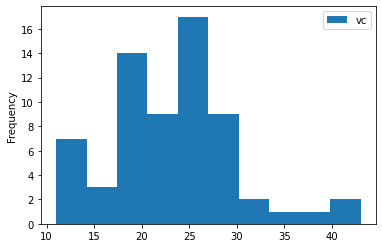

In [172]:
#basic EDA

dfsta.groupby("startday").agg(vc = ('Duration','count')).plot.hist()
dfsta.groupby("startday").agg(vc = ('Duration','count')).describe()
dfsta.groupby("arc").agg(vc = ('Duration','count')).vc.nlargest(n=5)

In [173]:
#duration seconds
dfsta['Dur_Seconds'] = dfsta.Duration / 60
dfsta['logdur'] = np.log(dfsta['Dur_Seconds'])

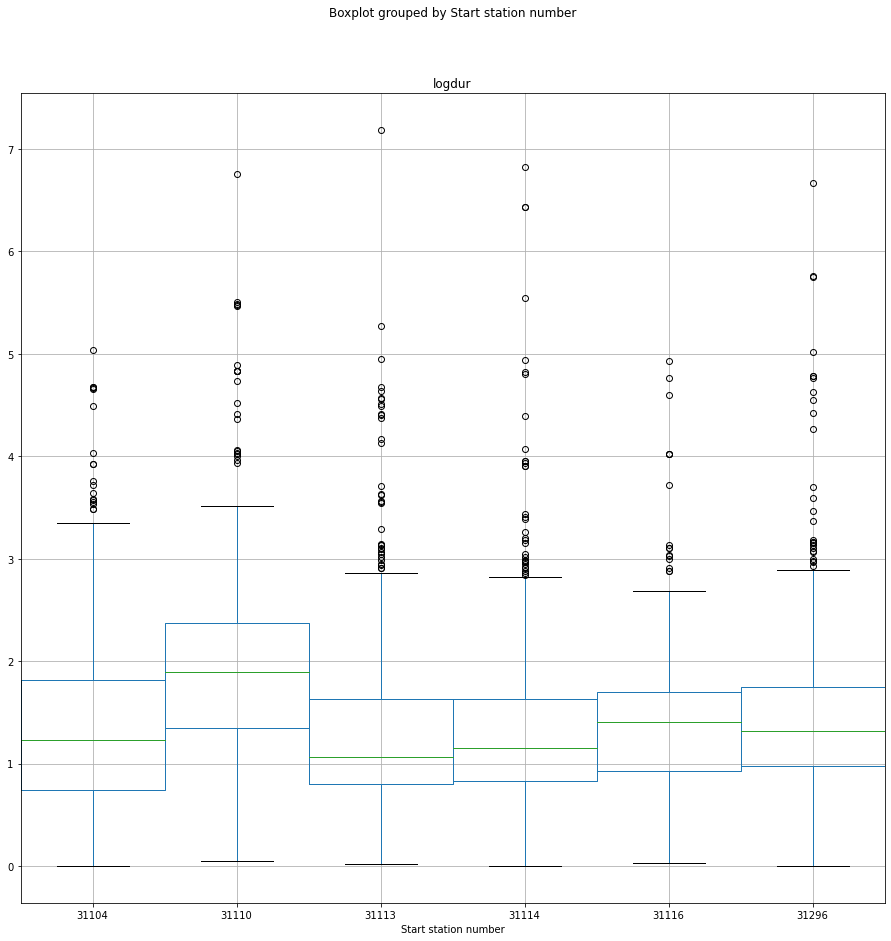

In [174]:
dfsta.boxplot(by='Start station number', 
                      column=['logdur'], 
                      grid=True, widths=1, figsize=(15, 15))

In [175]:
dfsta.groupby('Start station number').describe()
#significant outliers per node duration, suggest capping max duration at 75% of max(nodes) == node 31110 at 427

Duration                                                 \
                        count         mean          std   min     25%    50%   
Start station number                                                           
31104                   248.0   573.899194  1140.567727  60.0  126.00  205.0   
31110                   290.0  1108.272414  3598.362205  63.0  231.00  400.0   
31113                   252.0   929.845238  5162.163143  61.0  133.75  174.5   
31114                   263.0  1015.414449  4831.644099  60.0  137.00  189.0   
31116                   160.0   502.287500  1061.215397  62.0  151.25  244.0   
31296                   283.0   798.374558  3350.704089  60.0  159.50  225.0   

                                      End station number                \
                         75%      max              count          mean   
Start station number                                                     
31104                 368.25   9244.0              248.0  31138.000000   
31110                 644.25  51650.0              290.0  31148.175862   
31113                 305.75  79533.0              252.0  31146.892857   
31114                 305.50  54967.0              263.0  31146.076046   
31116                 326.50   8313.0              160.0  31147.743750   
31296                 343.50  47090.0              283.0  31139.537102   

                                                                              \
                            std      min      25%      50%      75%      max   
Start station number                                                           
31104                 65.363883  31104.0  31110.0  31114.0  31116.0  31296.0   
31110                 74.109431  31104.0  31110.0  31114.0  31116.0  31296.0   
31113                 72.534869  31104.0  31110.0  31113.0  31116.0  31296.0   
31114                 73.758438  31104.0  31110.0  31110.0  31114.0  31296.0   
31116                 74.466002  31104.0  31110.0  31113.0  31116.0  31296.0   
31296                 66.432826  31104.0  31110.0  31113.0  31116.0  31296.0   

                       memc                                               \
                      count      mean       std  min  25%  50%  75%  max   
Start station number                                                       
31104                 248.0  0.939516  0.238863  0.0  1.0  1.0  1.0  1.0   
31110                 290.0  0.865517  0.341760  0.0  1.0  1.0  1.0  1.0   
31113                 252.0  0.936508  0.244331  0.0  1.0  1.0  1.0  1.0   
31114                 263.0  0.901141  0.299042  0.0  1.0  1.0  1.0  1.0   
31116                 160.0  0.962500  0.190580  0.0  1.0  1.0  1.0  1.0   
31296                 283.0  0.961131  0.193626  0.0  1.0  1.0  1.0  1.0   

                       casc                                               \
                      count      mean       std  min  25%  50%  75%  max   
Start station number                                                       
31104                 248.0  0.060484  0.238863  0.0  0.0  0.0  0.0  1.0   
31110                 290.0  0.134483  0.341760  0.0  0.0  0.0  0.0  1.0   
31113                 252.0  0.063492  0.244331  0.0  0.0  0.0  0.0  1.0   
31114                 263.0  0.098859  0.299042  0.0  0.0  0.0  0.0  1.0   
31116                 160.0  0.037500  0.190580  0.0  0.0  0.0  0.0  1.0   
31296                 283.0  0.038869  0.193626  0.0  0.0  0.0  0.0  1.0   

                     startyes                                    endyes       \
                        count mean  std  min  25%  50%  75%  max  count mean   
Start station number                                                           
31104                   248.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  248.0  1.0   
31110                   290.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  290.0  1.0   
31113                   252.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  252.0  1.0   
31114                   263.0  1.0  0.0  1.0  1.0  1.0  1.0  1

In [176]:
dfsta.Dur_Seconds.describe()

count    1496.000000
mean       14.164516
std        61.385899
min         1.000000
25%         2.533333
50%         3.700000
75%         6.900000
max      1325.550000
Name: Dur_Seconds, dtype: float64

In [177]:
dfsta_bak = dfsta.copy()


In [178]:
dfsta = dfsta.loc[dfsta.Duration < \
                  dfsta.groupby('Start station number').describe().loc[31110,('Duration','75%')]]

#remove outlier > 75% of 31110

In [179]:
dfsta.Duration.describe() # OK

count    1235.000000
mean      226.372470
std       119.806491
min        60.000000
25%       140.000000
50%       194.000000
75%       288.500000
max       639.000000
Name: Duration, dtype: float64

In [180]:
dfsta.head()
dfsta.shape

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,memc,casc,startday,starttime,endday,endtime,arc,startyes,endyes,Holiday,weekday,Dur_Seconds,logdur
189,264,2019-04-01 06:15:20,2019-04-01 06:19:45,31296,Columbia & Ontario Rd NW,31110,20th St & Florida Ave NW,W20386,Member,1,0,2019-04-01,06:15:20,2019-04-01,06:19:45,31296-31110,1,1,False,0,4.400000,1.481605
2418,300,2019-04-01 10:29:54,2019-04-01 10:34:55,31110,20th St & Florida Ave NW,31104,Adams Mill & Columbia Rd NW,W20212,Member,1,0,2019-04-01,10:29:54,2019-04-01,10:34:55,31110-31104,1,1,False,0,5.000000,1.609438
2476,198,2019-04-01 10:48:08,2019-04-01 10:51:27,31104,Adams Mill & Columbia Rd NW,31110,20th St & Florida Ave NW,W20212,Member,1,0,2019-04-01,10:48:08,2019-04-01,10:51:27,31104-31110,1,1,False,0,3.300000,1.193922
2646,149,2019-04-01 11:35:12,2019-04-01 11:37:42,31113,Columbia Rd & Belmont St NW,31296,Columbia & Ontario Rd NW,W22480,Member,1,0,2019-04-01,11:35:12,2019-04-01,11:37:42,31113-31296,1,1,False,0,2.483333,0.909602
2707,261,2019-04-01 11:50:07,2019-04-01 11:54:28,31296,Columbia & Ontario Rd NW,31110,20th St & Florida Ave NW,W22480,Member,1,0,2019-04-01,11:50:07,2019-04-01,11:54:28,31296-31110,1,1,False,0,4.350000,1.470176


(1235, 22)

In [181]:
dfsta.groupby('Member type').agg(vcount = ('arc','count')) / dfsta.shape[0] 
#discrete pdf for member type within network

,vcount
Member type,
Casual,0.025911
Member,0.974089


In [182]:
arc_med = dfsta.groupby(['arc', 'Member type']).agg(vmed = ('Duration','median'), vc = ('Duration','count'))

arc_med.columns = ['median_val','count']

arc_med

median_val  count
arc         Member type                   
31104-31104 Member            130.5     18
31104-31110 Member            280.0     51
31104-31113 Member            122.5     18
31104-31114 Member            158.5     40
31104-31116 Member            159.0     47
31104-31296 Member             89.0     27
31110-31104 Member            374.0     31
31110-31110 Casual            380.0      7
            Member            314.5     22
31110-31113 Member            286.5     18
31110-31114 Casual            345.0      6
            Member            204.0     52
31110-31116 Member            196.5     26
31110-31296 Member            426.0     55
31113-31104 Casual            294.0      1
            Member            140.0     13
31113-31110 Casual            308.0      1
            Member            178.5     66
31113-31113 Member            254.0     21
31113-31114 Casual            256.0      1
            Member            117.0     32
31113-31116 Member            132.5     30
31113-31296 Member            159.0     44
31114-31104 Casual            373.5      2
            Member            171.5     44
31114-31110 Casual            115.0      1
            Member            135.5     84
31114-31113 Member            200.0     11
31114-31114 Casual            297.0      4
            Member            109.0     19
31114-31116 Casual            399.0      1
            Member            138.0      9
31114-31296 Casual            356.0      1
            Member            227.0     48
31116-31104 Member            262.0     32
31116-31110 Member            130.0     33
31116-31113 Member            233.0     15
31116-31114 Member             86.0     14
31116-31116 Casual            413.5      2
            Member            143.5     10
31116-31296 Member            272.5     32
31296-31104 Casual             85.0      1
            Member             94.5     28
31296-31110 Casual            390.0      1
            Member            286.5     64
31296-31113 Member            163.0     47
31296-31114 Casual            182.0      1
            Member            209.0     45
31296-31116 Member            177.5     34
31296-31296 Casual            192.0      2
            Member            153.0     23

In [183]:
arc_des = pd.merge(dfsta.groupby('arc').describe().iloc[:,:8],  
                      arc_med,  
                      on ='arc',  
                      how ='inner') 


/home/aryavish/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [184]:
arc_des['mean_less_med'] = arc_des[('Duration','mean')] - arc_des.median_val

In [185]:
arc_des 
# suggests right tail, likely some riders are just taking longer than others and exploring, suggest
# using median values to compute avg velocity
# suggest finding distance between stations Di / median Duration i
# then compute the weighted avg of the velocity vector to determine avg velocity of the rider within this
# network

,"(Duration, count)","(Duration, mean)","(Duration, std)","(Duration, min)","(Duration, 25%)","(Duration, 50%)","(Duration, 75%)","(Duration, max)",median_val,count,mean_less_med
arc,,,,,,,,,,,
31104-31104,18.0,185.555556,132.475180,60.0,69.25,130.5,319.25,441.0,130.5,18,55.055556
31104-31110,51.0,275.215686,69.525050,168.0,222.00,280.0,321.50,453.0,280.0,51,-4.784314
31104-31113,18.0,175.111111,115.350050,81.0,107.25,122.5,173.75,499.0,122.5,18,52.611111
31104-31114,40.0,181.125000,95.665868,91.0,125.00,158.5,190.25,606.0,158.5,40,22.625000
31104-31116,47.0,185.744681,84.995260,113.0,130.50,159.0,209.50,558.0,159.0,47,26.744681
31104-31296,27.0,97.407407,38.281608,61.0,74.50,89.0,113.50,251.0,89.0,27,8.407407
31110-31104,31.0,374.935484,104.714512,208.0,299.00,374.0,425.00,630.0,374.0,31,0.935484
31110-31110,29.0,325.620690,196.740114,63.0,130.00,320.0,516.00,629.0,380.0,7,-54.379310
31110-31110,29.0,325.620690,196.740114,63.0,130.00,320.0,516.00,629.0,314.5,22,11.120690


In [186]:
#export arc time in seconds (med,mean) for sim model

arc_exp = dfsta.groupby(['arc']).agg(vmedian = ('Duration','median'), vmean = ('Duration','mean'))

arc_exp

#arc_exp.to_csv("arc_times_seconds.csv", header=True, index=True)

,vmedian,vmean
arc,,
31104-31104,130.5,185.555556
31104-31110,280.0,275.215686
31104-31113,122.5,175.111111
31104-31114,158.5,181.125000
31104-31116,159.0,185.744681
31104-31296,89.0,97.407407
31110-31104,374.0,374.935484
31110-31110,320.0,325.620690
31110-31113,286.5,302.388889


In [187]:
dfsta.head()
dfsta.shape


,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,memc,casc,startday,starttime,endday,endtime,arc,startyes,endyes,Holiday,weekday,Dur_Seconds,logdur
189,264,2019-04-01 06:15:20,2019-04-01 06:19:45,31296,Columbia & Ontario Rd NW,31110,20th St & Florida Ave NW,W20386,Member,1,0,2019-04-01,06:15:20,2019-04-01,06:19:45,31296-31110,1,1,False,0,4.400000,1.481605
2418,300,2019-04-01 10:29:54,2019-04-01 10:34:55,31110,20th St & Florida Ave NW,31104,Adams Mill & Columbia Rd NW,W20212,Member,1,0,2019-04-01,10:29:54,2019-04-01,10:34:55,31110-31104,1,1,False,0,5.000000,1.609438
2476,198,2019-04-01 10:48:08,2019-04-01 10:51:27,31104,Adams Mill & Columbia Rd NW,31110,20th St & Florida Ave NW,W20212,Member,1,0,2019-04-01,10:48:08,2019-04-01,10:51:27,31104-31110,1,1,False,0,3.300000,1.193922
2646,149,2019-04-01 11:35:12,2019-04-01 11:37:42,31113,Columbia Rd & Belmont St NW,31296,Columbia & Ontario Rd NW,W22480,Member,1,0,2019-04-01,11:35:12,2019-04-01,11:37:42,31113-31296,1,1,False,0,2.483333,0.909602
2707,261,2019-04-01 11:50:07,2019-04-01 11:54:28,31296,Columbia & Ontario Rd NW,31110,20th St & Florida Ave NW,W22480,Member,1,0,2019-04-01,11:50:07,2019-04-01,11:54:28,31296-31110,1,1,False,0,4.350000,1.470176


(1235, 22)

In [188]:
stend = dfsta.groupby(['Start station number', 'End station number']).agg(vcount = ('Duration','count'))

stend.reset_index(level=0, inplace=True)
stend.reset_index(level=0, inplace=True)

In [189]:
stendpiv = stend.pivot(index='Start station number', columns='End station number', values='vcount')

a = np.sum(stendpiv, axis=1)

stendpiv
stend
# station i to j is factors, NOT ORDINAL thus u can't fit any distro other than histo

End station number,31104,31110,31113,31114,31116,31296
Start station number,,,,,,
31104,18,51,18,40,47,27
31110,31,29,18,58,26,55
31113,14,67,21,33,30,44
31114,46,85,11,23,10,49
31116,32,33,15,14,12,32
31296,29,65,47,46,34,25


,End station number,Start station number,vcount
0,31104,31104,18
1,31110,31104,51
2,31113,31104,18
3,31114,31104,40
4,31116,31104,47
5,31296,31104,27
6,31104,31110,31
7,31110,31110,29
8,31113,31110,18
9,31114,31110,58


In [190]:
for item in a.items():
    stendpiv.loc[item[0],:] = stendpiv.loc[item[0],:] / item[1] 


# take median duration node i to node j and use that

In [191]:
stendpiv
np.sum(stendpiv, axis=1) #joint pdf start-end finalized, note not symmetrical

End station number,31104,31110,31113,31114,31116,31296
Start station number,,,,,,
31104,0.089552,0.253731,0.089552,0.199005,0.233831,0.134328
31110,0.142857,0.133641,0.082949,0.267281,0.119816,0.253456
31113,0.066986,0.320574,0.100478,0.157895,0.143541,0.210526
31114,0.205357,0.379464,0.049107,0.102679,0.044643,0.218750
31116,0.231884,0.239130,0.108696,0.101449,0.086957,0.231884
31296,0.117886,0.264228,0.191057,0.186992,0.138211,0.101626


Start station number
31104    1.0
31110    1.0
31113    1.0
31114    1.0
31116    1.0
31296    1.0
dtype: float64

In [192]:
# analyze date data

#ensure start date = end date
np.sum(dfsta.loc[:,'startday'] != dfsta.loc[:,'endday']) # sum 0, so OK

# look at counts by startday/end day immaterial
dfday = dfsta.groupby('startday').agg(vc = ('Duration','count'))

dfday.reset_index(level=0,inplace=True)
#significant variation in same days different weeks, suggests periodicity

#look at data by same weekday
dfsta.groupby('weekday').describe()
# although modelling single day, there is no exhibited trend and periodicity for bike demand per day as 
# evidenced in the ACF below, thus select ALL weekdays to compute the inter-arrival times per hrly period


dfday = dfsta


0

Duration                                                              \
           count        mean         std   min     25%    50%     75%    max   
weekday                                                                        
0          249.0  226.100402  124.942963  60.0  140.00  191.0  284.00  629.0   
1          227.0  221.101322  112.014630  63.0  138.50  188.0  280.50  639.0   
2          228.0  225.837719  119.313399  60.0  140.25  195.0  285.00  617.0   
3          260.0  224.730769  116.483236  60.0  145.50  198.5  279.25  630.0   
4          271.0  233.062731  125.318320  61.0  138.00  196.0  315.00  619.0   

        Start station number                                             \
                       count          mean        std      min      25%   
weekday                                                                   
0                      249.0  31149.004016  74.841957  31104.0  31110.0   
1                      227.0  31144.563877  71.349130  31104.0  31110.0   
2                      228.0  31152.890351  77.065515  31104.0  31110.0   
3                      260.0  31142.250000  69.625772  31104.0  31110.0   
4                      271.0  31151.250923  76.592692  31104.0  31110.0   

                                   End station number                \
             50%      75%      max              count          mean   
weekday                                                               
0        31113.0  31116.0  31296.0              249.0  31153.285141   
1        31113.0  31116.0  31296.0              227.0  31140.251101   
2        31114.0  31116.0  31296.0              228.0  31147.837719   
3        31113.0  31116.0  31296.0              260.0  31142.653846   
4        31113.0  31116.0  31296.0              271.0  31145.313653   

                                                                  memc  \
               std      min      25%      50%      75%      max  count   
weekday                                                                  
0        77.995780  31104.0  31110.0  31113.0  31116.0  31296.0  249.0   
1        67.868584  31104.0  31110.0  31113.0  31116.0  31296.0  227.0   
2        73.704942  31104.0  31110.0  31113.0  31116.0  31296.0  228.0   
3        69.428635  31104.0  31110.0  31114.0  31116.0  31296.0  260.0   
4        71.893861  31104.0  31110.0  31114.0  31116.0  31296.0  271.0   

                                                       casc            \
             mean       std  min  25%  50%  75%  max  count      mean   
weekday                                                                 
0        0.955823  0.205901  0.0  1.0  1.0  1.0  1.0  249.0  0.044177   
1        0.986784  0.114450  0.0  1.0  1.0  1.0  1.0  227.0  0.013216   
2        0.995614  0.066227  0.0  1.0  1.0  1.0  1.0  228.0  0.004386   
3        0.973077  0.162171  0.0  1.0  1.0  1.0  1.0  260.0  0.026923   
4        0.963100  0.188866  0.0  1.0  1.0  1.0  1.0  271.0  0.036900   

                                           startyes                           \
              std  min  25%  50%  75%  max    count mean  std  min  25%  50%   
weekday                                                                        
0        0.205901  0.0  0.0  0.0  0.0  1.0    249.0  1.0  0.0  1.0  1.0  1.0   
1        0.114450  0.0  0.0  0.0  0.0  1.0    227.0  1.0  0.0  1.0  1.0  1.0   
2        0.066227  0.0  0.0  0.0  0.0  1.0    228.0  1.0  0.0  1.0  1.0  1.0   
3        0.162171  0.0  0.0  0.0  0.0  1.0    260.0  1.0  0.0  1.0  1.0  1.0   
4        0.188866  0.0  0.0  0.0  0.0  1.0    271.0  1.0  0.0  1.0  1.0  1.0   

                  endyes                                    Dur_Seconds  \
         75%  max  count mean  std  min  25%  50%  75%  max       count   
weekday                                                                   
0        1.0  1.0  249.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0       249.0   
1        1.0  1.0  227.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0       227.0   
2  

,vc
startday,
2019-04-01,35
2019-04-02,10
2019-04-03,12
2019-04-04,22
2019-04-05,20
2019-04-08,19
2019-04-09,20
2019-04-10,23
2019-04-11,18


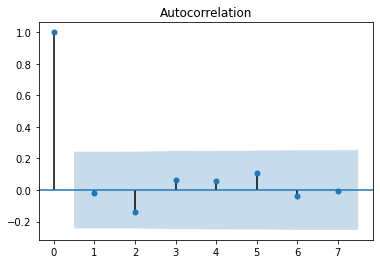

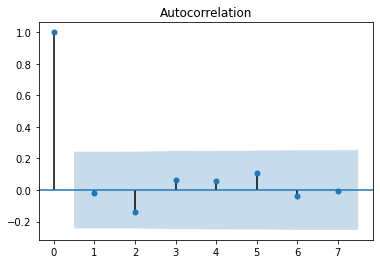

In [193]:
dfstacount = dfsta.groupby('startday').agg(vc = ('Duration','count'))

dfstacount
plot_acf(dfstacount.vc, lags=7)

print("\n")



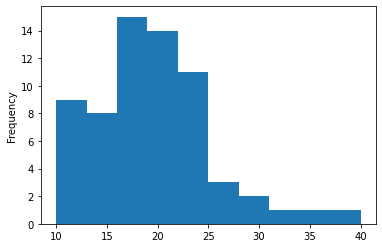

In [194]:
dfstacount.vc.plot.hist()

<Figure size 1080x1080 with 0 Axes>

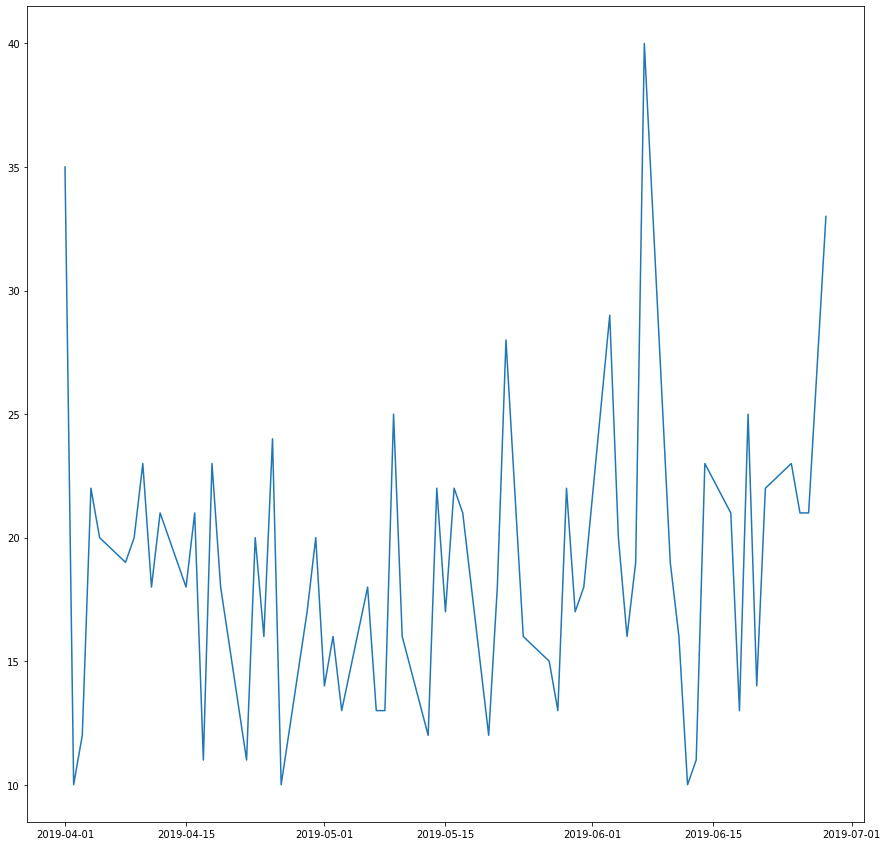

In [195]:
plt.figure(figsize=(15,15))
plt.plot(dfstacount.index,dfstacount.vc)

19.0

startday
2019-04-01    16.0
2019-04-02    -9.0
2019-04-03    -7.0
2019-04-04     3.0
2019-04-05     1.0
2019-04-08     0.0
2019-04-09     1.0
2019-04-10     4.0
2019-04-11    -1.0
2019-04-12     2.0
2019-04-15    -1.0
2019-04-16     2.0
2019-04-17    -8.0
2019-04-18     4.0
2019-04-19    -1.0
2019-04-22    -8.0
2019-04-23     1.0
2019-04-24    -3.0
2019-04-25     5.0
2019-04-26    -9.0
2019-04-29    -2.0
2019-04-30     1.0
2019-05-01    -5.0
2019-05-02    -3.0
2019-05-03    -6.0
2019-05-06    -1.0
2019-05-07    -6.0
2019-05-08    -6.0
2019-05-09     6.0
2019-05-10    -3.0
2019-05-13    -7.0
2019-05-14     3.0
2019-05-15    -2.0
2019-05-16     3.0
2019-05-17     2.0
2019-05-20    -7.0
2019-05-21    -1.0
2019-05-22     9.0
2019-05-23     3.0
2019-05-24    -3.0
2019-05-27    -4.0
2019-05-28    -6.0
2019-05-29     3.0
2019-05-30    -2.0
2019-05-31    -1.0
2019-06-03    10.0
2019-06-04     1.0
2019-06-05    -3.0
2019-06-06     0.0
2019-06-07    21.0
2019-06-10     0.0
2019-06-11    -3.0
201

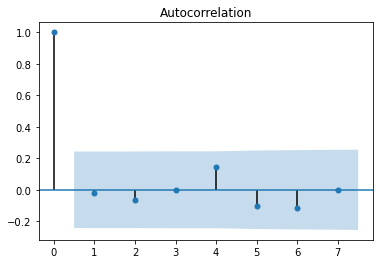

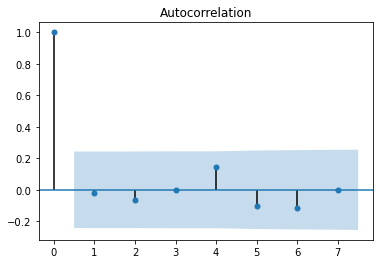

In [196]:
# look at conditionla heterskedasticity

dfstacount.vc.mean()
dfstacount.vc - dfstacount.vc.mean()

plot_acf((dfstacount.vc - dfstacount.vc.mean())**2, lags=7) # no conditional var

In [197]:


dfdayper = dfday.groupby('startday').agg(vc = ('Duration','count'))

dfdayper

dfdayper.vc.mean()

,vc
startday,
2019-04-01,35
2019-04-02,10
2019-04-03,12
2019-04-04,22
2019-04-05,20
2019-04-08,19
2019-04-09,20
2019-04-10,23
2019-04-11,18


19.0

<Figure size 1080x1080 with 0 Axes>

Text(0, 0.5, '# Bike Rides')

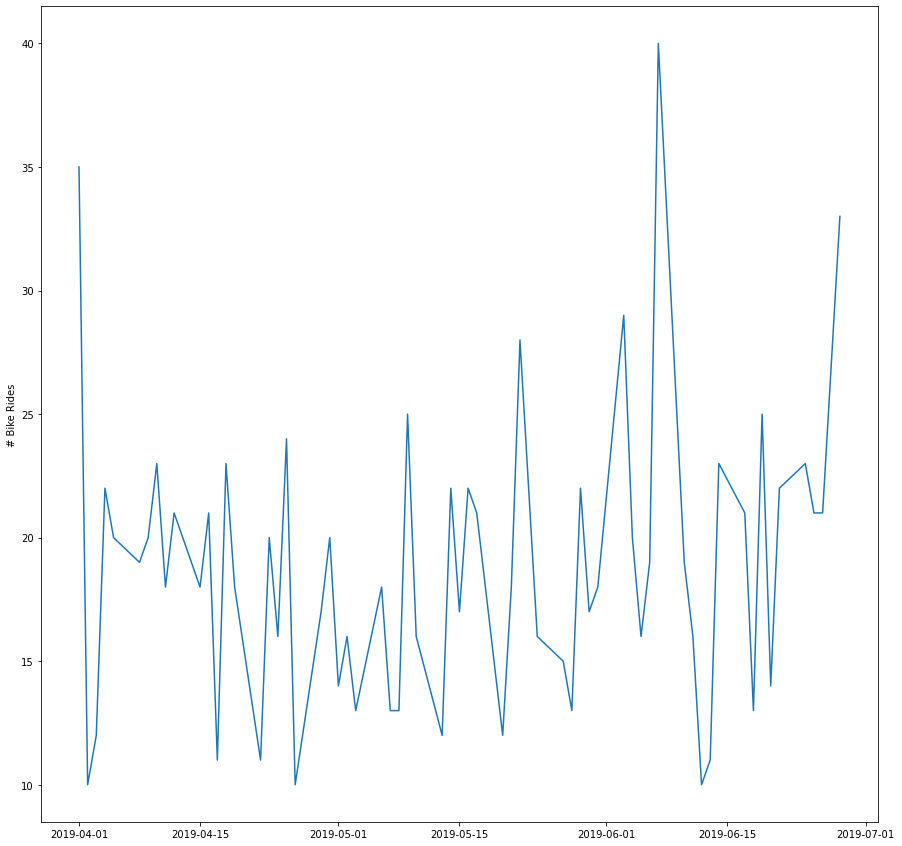

In [198]:
plt.figure(figsize=(15,15))
plt.plot(dfdayper.index,dfdayper.vc)
plt.ylabel("# Bike Rides")


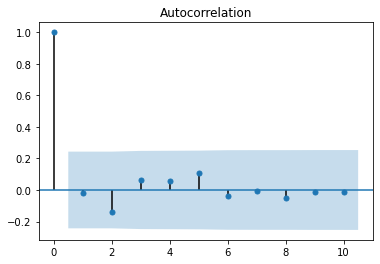

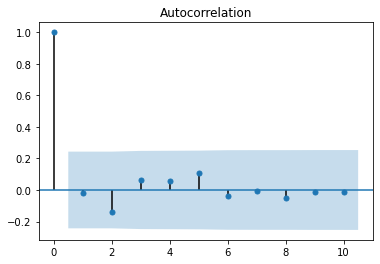

In [199]:
vc = dfdayper.vc
plot_acf(vc, lags=10)

#ACF plot indicates no autocorrelation..

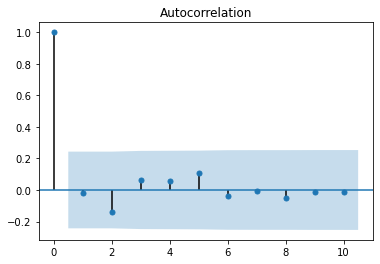

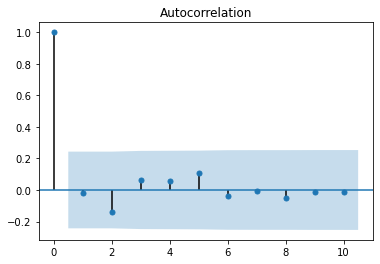

In [200]:
vc_garch = vc - np.mean(vc)

plot_acf(vc_garch, lags=10)
#no indication of conditional heteroskedasticity, variance remains constant

In [201]:
# 

dfday['starthour'] = [d.time().hour for d in dfday['Start date']]


In [202]:
dfday

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,memc,casc,startday,starttime,endday,endtime,arc,startyes,endyes,Holiday,weekday,Dur_Seconds,logdur,starthour
189,264,2019-04-01 06:15:20,2019-04-01 06:19:45,31296,Columbia & Ontario Rd NW,31110,20th St & Florida Ave NW,W20386,Member,1,0,2019-04-01,06:15:20,2019-04-01,06:19:45,31296-31110,1,1,False,0,4.400000,1.481605,6
2418,300,2019-04-01 10:29:54,2019-04-01 10:34:55,31110,20th St & Florida Ave NW,31104,Adams Mill & Columbia Rd NW,W20212,Member,1,0,2019-04-01,10:29:54,2019-04-01,10:34:55,31110-31104,1,1,False,0,5.000000,1.609438,10
2476,198,2019-04-01 10:48:08,2019-04-01 10:51:27,31104,Adams Mill & Columbia Rd NW,31110,20th St & Florida Ave NW,W20212,Member,1,0,2019-04-01,10:48:08,2019-04-01,10:51:27,31104-31110,1,1,False,0,3.300000,1.193922,10
2646,149,2019-04-01 11:35:12,2019-04-01 11:37:42,31113,Columbia Rd & Belmont St NW,31296,Columbia & Ontario Rd NW,W22480,Member,1,0,2019-04-01,11:35:12,2019-04-01,11:37:42,31113-31296,1,1,False,0,2.483333,0.909602,11
2707,261,2019-04-01 11:50:07,2019-04-01 11:54:28,31296,Columbia & Ontario Rd NW,31110,20th St & Florida Ave NW,W22480,Member,1,0,2019-04-01,11:50:07,2019-04-01,11:54:28,31296-31110,1,1,False,0,4.350000,1.470176,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327585,328,2019-06-28 20:49:13,2019-06-28 20:54:41,31104,Adams Mill & Columbia Rd NW,31104,Adams Mill & Columbia Rd NW,W24274,Member,1,0,2019-06-28,20:49:13,2019-06-28,20:54:41,31104-31104,1,1,False,4,5.466667,1.698669,20
328093,509,2019-06-28 21:55:44,2019-06-28 22:04:14,31110,20th St & Florida Ave NW,31296,Columbia & Ontario Rd NW,W22043,Member,1,0,2019-06-28,21:55:44,2019-06-28,22:04:14,31110-31296,1,1,False,4,8.483333,2.138103,21
328095,490,2019-06-28 21:56:21,2019-06-28 22:04:32,31110,20th St & Florida Ave NW,31296,Columbia & Ontario Rd NW,W22406,Member,1,0,2019-06-28,21:56:21,2019-06-28,22:04:32,31110-31296,1,1,False,4,8.166667,2.100061,21
328164,619,2019-06-28 22:09:24,2019-06-28 22:19:43,31110,20th St & Florida Ave NW,31296,Columbia & Ontario Rd NW,W22699,Member,1,0,2019-06-28,22:09:24,2019-06-28,22:19:43,31110-31296,1,1,False,4,10.316667,2.333761,22


In [203]:
dfhour = dfday.groupby(['starthour','startday']).agg(count = ('starthour','count'))


In [204]:
dfhour.reset_index(level=0, inplace=True)
dfhour.reset_index(level=0, inplace=True)

In [205]:
dfhour.groupby('startday').agg(perday = ('count','sum'))

,perday
startday,
2019-04-01,35
2019-04-02,10
2019-04-03,12
2019-04-04,22
2019-04-05,20
2019-04-08,19
2019-04-09,20
2019-04-10,23
2019-04-11,18


In [206]:
dfhour[dfhour.startday == datetime.date(2019,6,13)]

,startday,starthour,count
101,2019-06-13,7,3
145,2019-06-13,8,1
203,2019-06-13,10,1
297,2019-06-13,13,1
397,2019-06-13,16,1
500,2019-06-13,18,1
553,2019-06-13,19,1
606,2019-06-13,20,1
650,2019-06-13,21,1


In [207]:
dfhour.head()


,startday,starthour,count
0,2019-05-02,0,1
1,2019-05-23,0,2
2,2019-05-27,0,1
3,2019-06-04,0,1
4,2019-06-11,0,1


In [208]:
dfhour[dfhour.starthour == 0]; dfhour[dfhour.starthour == 0].mean()
dfhour[dfhour.starthour == 8]

,startday,starthour,count
0,2019-05-02,0,1
1,2019-05-23,0,2
2,2019-05-27,0,1
3,2019-06-04,0,1
4,2019-06-11,0,1
5,2019-06-12,0,1
6,2019-06-19,0,1
7,2019-06-20,0,1
8,2019-06-27,0,1


starthour    0.000000
count        1.111111
dtype: float64

,startday,starthour,count
111,2019-04-04,8,1
112,2019-04-05,8,1
113,2019-04-08,8,1
114,2019-04-09,8,1
115,2019-04-10,8,1
116,2019-04-12,8,2
117,2019-04-17,8,1
118,2019-04-18,8,4
119,2019-04-19,8,1
120,2019-04-22,8,1


In [209]:
dfhrmean = dfhour.groupby('starthour').agg(vmean = ('count','mean'))

dfhrmean #is doing exactly per textbook where obs is row and hr of day is col i,j = # of rides
#takes mean per col across ALL days since no periodicity

,vmean
starthour,
0,1.111111
1,1.000000
2,1.666667
3,1.000000
4,1.000000
5,1.100000
6,1.729730
7,2.340426
8,1.454545


In [210]:
dfhrmean.sum() # 37 trips is not reflective of the mean 19; #need smoother decision boundary
#here we want to sacrifice bias for lower variance

vmean    37.274482
dtype: float64

<Figure size 1080x1080 with 0 Axes>

([<matplotlib.axis.XTick at 0x7f7355418160>,
 <a list of 24 Text major ticklabel objects>)

Text(0, 0.5, 'Bike Arrivals, Total')

Text(0.5, 0, 'Hour in Day')

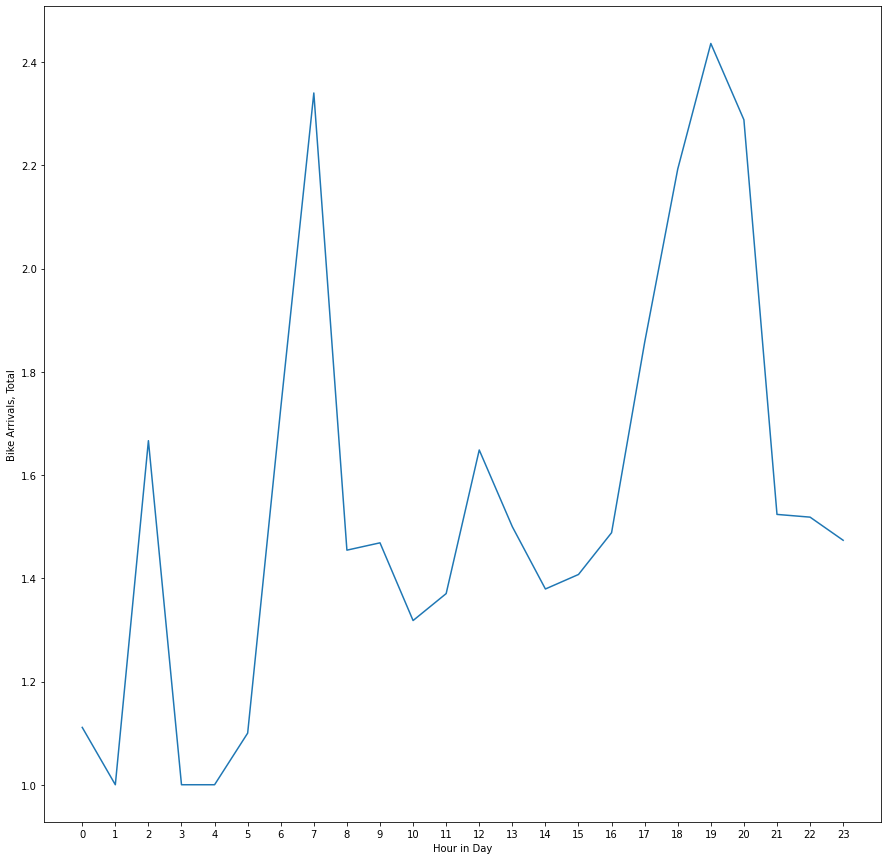

In [211]:
plt.figure(figsize=(15,15))
plt.plot(dfhrmean.index,dfhrmean.vmean)
plt.xticks(np.arange(0, 24, 1.0))
plt.ylabel("Bike Arrivals, Total")
plt.xlabel("Hour in Day")

In [212]:
dfhrmean[dfhrmean.index<=5].mean()

vmean    1.146296
dtype: float64

In [213]:
dfday
dfday.shape

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,memc,casc,startday,starttime,endday,endtime,arc,startyes,endyes,Holiday,weekday,Dur_Seconds,logdur,starthour
189,264,2019-04-01 06:15:20,2019-04-01 06:19:45,31296,Columbia & Ontario Rd NW,31110,20th St & Florida Ave NW,W20386,Member,1,0,2019-04-01,06:15:20,2019-04-01,06:19:45,31296-31110,1,1,False,0,4.400000,1.481605,6
2418,300,2019-04-01 10:29:54,2019-04-01 10:34:55,31110,20th St & Florida Ave NW,31104,Adams Mill & Columbia Rd NW,W20212,Member,1,0,2019-04-01,10:29:54,2019-04-01,10:34:55,31110-31104,1,1,False,0,5.000000,1.609438,10
2476,198,2019-04-01 10:48:08,2019-04-01 10:51:27,31104,Adams Mill & Columbia Rd NW,31110,20th St & Florida Ave NW,W20212,Member,1,0,2019-04-01,10:48:08,2019-04-01,10:51:27,31104-31110,1,1,False,0,3.300000,1.193922,10
2646,149,2019-04-01 11:35:12,2019-04-01 11:37:42,31113,Columbia Rd & Belmont St NW,31296,Columbia & Ontario Rd NW,W22480,Member,1,0,2019-04-01,11:35:12,2019-04-01,11:37:42,31113-31296,1,1,False,0,2.483333,0.909602,11
2707,261,2019-04-01 11:50:07,2019-04-01 11:54:28,31296,Columbia & Ontario Rd NW,31110,20th St & Florida Ave NW,W22480,Member,1,0,2019-04-01,11:50:07,2019-04-01,11:54:28,31296-31110,1,1,False,0,4.350000,1.470176,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327585,328,2019-06-28 20:49:13,2019-06-28 20:54:41,31104,Adams Mill & Columbia Rd NW,31104,Adams Mill & Columbia Rd NW,W24274,Member,1,0,2019-06-28,20:49:13,2019-06-28,20:54:41,31104-31104,1,1,False,4,5.466667,1.698669,20
328093,509,2019-06-28 21:55:44,2019-06-28 22:04:14,31110,20th St & Florida Ave NW,31296,Columbia & Ontario Rd NW,W22043,Member,1,0,2019-06-28,21:55:44,2019-06-28,22:04:14,31110-31296,1,1,False,4,8.483333,2.138103,21
328095,490,2019-06-28 21:56:21,2019-06-28 22:04:32,31110,20th St & Florida Ave NW,31296,Columbia & Ontario Rd NW,W22406,Member,1,0,2019-06-28,21:56:21,2019-06-28,22:04:32,31110-31296,1,1,False,4,8.166667,2.100061,21
328164,619,2019-06-28 22:09:24,2019-06-28 22:19:43,31110,20th St & Florida Ave NW,31296,Columbia & Ontario Rd NW,W22699,Member,1,0,2019-06-28,22:09:24,2019-06-28,22:19:43,31110-31296,1,1,False,4,10.316667,2.333761,22


(1235, 23)

In [214]:
## get assumption statistic on travel time node i -> node j

dfday.pivot_table(index='Start station number', columns='End station number', values='Duration', aggfunc=np.mean)

#matrix is non-symmetric, takes into account traffic patterns and other factors that affect travel time

End station number,31104,31110,31113,31114,31116,31296
Start station number,,,,,,
31104,185.555556,275.215686,175.111111,181.125000,185.744681,97.407407
31110,374.935484,325.620690,302.388889,240.482759,210.423077,435.036364
31113,198.714286,201.149254,270.190476,125.636364,159.666667,173.522727
31114,204.478261,142.858824,241.000000,232.826087,242.000000,254.775510
31116,259.875000,141.363636,254.133333,131.214286,255.416667,287.812500
31296,161.793103,304.830769,193.021277,231.260870,189.558824,242.120000


In [215]:
# blocks: 
#[5,9,16,20,24], rh <= 5,

blocks_old = [5,9,16,20,24]

blocks = [5,9,16,20,22,24]

def setblock(x, blocks):
    for y in range(len(blocks)):
        if x <= blocks[y]:
            return y+1   
    
    return None

  
dfday["block"] = dfday['starthour'].apply(lambda x: setblock(x,blocks))
                                   



In [216]:
dfday

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,memc,casc,startday,starttime,endday,endtime,arc,startyes,endyes,Holiday,weekday,Dur_Seconds,logdur,starthour,block
189,264,2019-04-01 06:15:20,2019-04-01 06:19:45,31296,Columbia & Ontario Rd NW,31110,20th St & Florida Ave NW,W20386,Member,1,0,2019-04-01,06:15:20,2019-04-01,06:19:45,31296-31110,1,1,False,0,4.400000,1.481605,6,2
2418,300,2019-04-01 10:29:54,2019-04-01 10:34:55,31110,20th St & Florida Ave NW,31104,Adams Mill & Columbia Rd NW,W20212,Member,1,0,2019-04-01,10:29:54,2019-04-01,10:34:55,31110-31104,1,1,False,0,5.000000,1.609438,10,3
2476,198,2019-04-01 10:48:08,2019-04-01 10:51:27,31104,Adams Mill & Columbia Rd NW,31110,20th St & Florida Ave NW,W20212,Member,1,0,2019-04-01,10:48:08,2019-04-01,10:51:27,31104-31110,1,1,False,0,3.300000,1.193922,10,3
2646,149,2019-04-01 11:35:12,2019-04-01 11:37:42,31113,Columbia Rd & Belmont St NW,31296,Columbia & Ontario Rd NW,W22480,Member,1,0,2019-04-01,11:35:12,2019-04-01,11:37:42,31113-31296,1,1,False,0,2.483333,0.909602,11,3
2707,261,2019-04-01 11:50:07,2019-04-01 11:54:28,31296,Columbia & Ontario Rd NW,31110,20th St & Florida Ave NW,W22480,Member,1,0,2019-04-01,11:50:07,2019-04-01,11:54:28,31296-31110,1,1,False,0,4.350000,1.470176,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327585,328,2019-06-28 20:49:13,2019-06-28 20:54:41,31104,Adams Mill & Columbia Rd NW,31104,Adams Mill & Columbia Rd NW,W24274,Member,1,0,2019-06-28,20:49:13,2019-06-28,20:54:41,31104-31104,1,1,False,4,5.466667,1.698669,20,4
328093,509,2019-06-28 21:55:44,2019-06-28 22:04:14,31110,20th St & Florida Ave NW,31296,Columbia & Ontario Rd NW,W22043,Member,1,0,2019-06-28,21:55:44,2019-06-28,22:04:14,31110-31296,1,1,False,4,8.483333,2.138103,21,5
328095,490,2019-06-28 21:56:21,2019-06-28 22:04:32,31110,20th St & Florida Ave NW,31296,Columbia & Ontario Rd NW,W22406,Member,1,0,2019-06-28,21:56:21,2019-06-28,22:04:32,31110-31296,1,1,False,4,8.166667,2.100061,21,5
328164,619,2019-06-28 22:09:24,2019-06-28 22:19:43,31110,20th St & Florida Ave NW,31296,Columbia & Ontario Rd NW,W22699,Member,1,0,2019-06-28,22:09:24,2019-06-28,22:19:43,31110-31296,1,1,False,4,10.316667,2.333761,22,5


In [217]:
ta = dfday.groupby(['block','startday']).agg(vsum = ('Duration','count'))

ta.reset_index(level=0,inplace=True)
ta.reset_index(level=0,inplace=True)


In [218]:
ta.groupby('block').agg(vm = ('vsum','mean'))

6.8/12
12.18/12

,vm
block,
1,1.291667
2,4.523810
3,5.031746
4,7.215385
5,2.187500
6,1.473684


0.5666666666666667

1.015

In [219]:
dfblock = dfday.groupby(['block','startday']).agg(vc = ('block','count'))

dfblock.reset_index(level = 0, inplace=True)
dfblock.reset_index(level = 0, inplace=True)

dfblock

,startday,block,vc
0,2019-04-02,1,1
1,2019-04-09,1,2
2,2019-04-10,1,1
3,2019-04-12,1,1
4,2019-04-24,1,1
...,...,...,...
277,2019-06-07,6,5
278,2019-06-10,6,1
279,2019-06-19,6,1
280,2019-06-20,6,1


In [220]:
dfblockfinal = dfblock.groupby('block').agg(vmean = ('vc','mean'))

blocklength = []

blocks[4]
blocks
for x in range(len(blocks)):
    if x == 0:
        blocklength.append(blocks[x])
    else:
        blocklength.append(blocks[x] - blocks[x-1])

        
dfblockfinal; print(" mean riders per day is",dfblockfinal.sum())
blocklength
#(0-5]am, 6-9am, 10-4pm, 5pm-8pm, 9pm-11pm
#[12-6am), 6-10,10-5,5-9,9-11,11-12

22

[5, 9, 16, 20, 22, 24]

,vmean
block,
1,1.291667
2,4.523810
3,5.031746
4,7.215385
5,2.187500
6,1.473684


 mean riders per day is vmean    21.723791
dtype: float64


[5, 4, 7, 4, 2, 2]

In [221]:
dfblockfinal['blocklength'] = blocks

dfblockfinal


,vmean,blocklength
block,,
1,1.291667,5
2,4.523810,9
3,5.031746,16
4,7.215385,20
5,2.187500,22
6,1.473684,24


In [222]:
vhr = pd.DataFrame({"hr":list(range(24))})

def get_vmean(x):
    for i in range(dfblockfinal.shape[0]):
        if x <= dfblockfinal.iloc[i,1]:
            return dfblockfinal.iloc[i,0]

        
vhr['poisson'] = vhr.hr.apply(lambda x: get_vmean(x))
    

In [223]:
vhr

,hr,poisson
0,0,1.291667
1,1,1.291667
2,2,1.291667
3,3,1.291667
4,4,1.291667
5,5,1.291667
6,6,4.523810
7,7,4.523810
8,8,4.523810
9,9,4.523810


<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Poisson Nonstationary $\\lambda (t)$ 24 hr period')

Text(0.5, 0, 'Hour in Day (t)')

Text(0, 0.5, 'Poisson Arrival Rate $\\lambda (t)$')

([<matplotlib.axis.XTick at 0x7f7356f547c0>,
 <a list of 24 Text major ticklabel objects>)

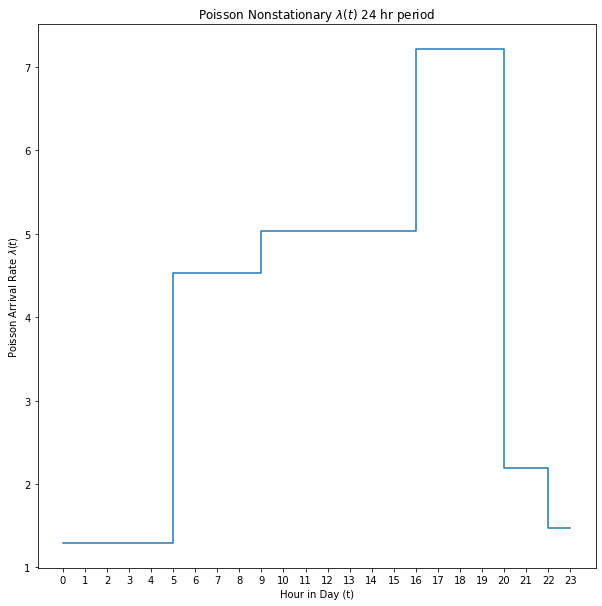

In [224]:
plt.figure(figsize=(10,10))
plt.step(vhr.hr, vhr.poisson)
plt.title(r'Poisson Nonstationary $\lambda (t)$ 24 hr period')
plt.xlabel('Hour in Day (t)')
plt.ylabel(r'Poisson Arrival Rate $\lambda (t)$')
plt.xticks(np.arange(24))


In [225]:
dfday.loc[(dfday['startday'] == datetime.date(2019,5,23)) & (dfday['block'] == 1)]



,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,memc,casc,startday,starttime,endday,endtime,arc,startyes,endyes,Holiday,weekday,Dur_Seconds,logdur,starthour,block
234037,103,2019-05-23 00:26:54,2019-05-23 00:28:38,31113,Columbia Rd & Belmont St NW,31104,Adams Mill & Columbia Rd NW,W21886,Member,1,0,2019-05-23,00:26:54,2019-05-23,00:28:38,31113-31104,1,1,False,3,1.716667,0.540384,0,1
234052,94,2019-05-23 00:44:52,2019-05-23 00:46:26,31104,Adams Mill & Columbia Rd NW,31113,Columbia Rd & Belmont St NW,W01172,Member,1,0,2019-05-23,00:44:52,2019-05-23,00:46:26,31104-31113,1,1,False,3,1.566667,0.448950,0,1
234190,349,2019-05-23 05:44:02,2019-05-23 05:49:51,31114,18th St & Wyoming Ave NW,31296,Columbia & Ontario Rd NW,W23823,Member,1,0,2019-05-23,05:44:02,2019-05-23,05:49:51,31114-31296,1,1,False,3,5.816667,1.760727,5,1
234233,197,2019-05-23 05:57:30,2019-05-23 06:00:48,31110,20th St & Florida Ave NW,31114,18th St & Wyoming Ave NW,W23422,Member,1,0,2019-05-23,05:57:30,2019-05-23,06:00:48,31110-31114,1,1,False,3,3.283333,1.188859,5,1


In [226]:
## get demand 8/20

df820 = pd.read_csv("202008-capitalbikeshare-tripdata.csv")

df820.shape
df820.groupby('rideable_type').agg(vc = ('ride_id','count'))/df820.shape[0] ## better sample data


df820.head()

(251543, 13)

,vc
rideable_type,
docked_bike,0.802773
electric_bike,0.197227


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,83BBA2BAF43E033F,electric_bike,2020-08-21 19:28:29,2020-08-21 20:01:51,Crystal Dr & 27th St S,10.0,17th & K St NW / Farragut Square,149.0,38.848435,-77.051011,38.902033,-77.038427,casual
1,5B6AD9DC894D0A99,electric_bike,2020-08-21 16:07:34,2020-08-21 16:39:15,14th & V St NW,14.0,NaN,NaN,38.917832,-77.031740,38.890000,-77.020000,casual
2,9103B03D0BE9E814,electric_bike,2020-08-21 13:11:34,2020-08-21 13:29:42,NaN,NaN,NaN,NaN,38.890000,-76.990000,38.900000,-77.030000,casual
3,48446C6C2205A658,electric_bike,2020-08-21 13:33:47,2020-08-21 13:45:36,NaN,NaN,NaN,NaN,38.900000,-77.030000,38.920000,-77.050000,casual
4,6E9F209E48DC9F0E,electric_bike,2020-08-21 16:27:16,2020-08-21 16:45:57,Maryland Ave & 17th St NE,590.0,New York Ave & Hecht Ave NE,418.0,38.901954,-76.978624,38.915485,-76.983657,casual


In [227]:
df820.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,83BBA2BAF43E033F,electric_bike,2020-08-21 19:28:29,2020-08-21 20:01:51,Crystal Dr & 27th St S,10.0,17th & K St NW / Farragut Square,149.0,38.848435,-77.051011,38.902033,-77.038427,casual
1,5B6AD9DC894D0A99,electric_bike,2020-08-21 16:07:34,2020-08-21 16:39:15,14th & V St NW,14.0,NaN,NaN,38.917832,-77.031740,38.890000,-77.020000,casual
2,9103B03D0BE9E814,electric_bike,2020-08-21 13:11:34,2020-08-21 13:29:42,NaN,NaN,NaN,NaN,38.890000,-76.990000,38.900000,-77.030000,casual
3,48446C6C2205A658,electric_bike,2020-08-21 13:33:47,2020-08-21 13:45:36,NaN,NaN,NaN,NaN,38.900000,-77.030000,38.920000,-77.050000,casual
4,6E9F209E48DC9F0E,electric_bike,2020-08-21 16:27:16,2020-08-21 16:45:57,Maryland Ave & 17th St NE,590.0,New York Ave & Hecht Ave NE,418.0,38.901954,-76.978624,38.915485,-76.983657,casual


In [228]:
#read in nodemap as node vals changed

nodemap = pd.read_csv("nodemap.csv")

In [229]:
nodemap = nodemap.T

nodemap
nodemap = pd.Series(nodemap.index.values,index=nodemap.iloc[:,0]).to_dict()

,0
31102,11th & Kenyon St NW
32039,Old Georgetown Rd & Southwick St
31222,New York Ave & 15th St NW
31506,1st & Rhode Island Ave NW
31041,Prince St & Union St
...,...
31815,19th & Savannah St SE
31715,37th & Ely Pl SE / Fort Dupont Ice Arena
31819,Joliet St & MLK Ave SW/Bald Eagle Rec Ctr
31646,Maine Ave & 9th St SW


In [230]:
df820['startnode'] = df820.start_station_name.map(nodemap)
df820['endnode'] = df820.end_station_name.map(nodemap)

df820['startnode'] = pd.to_numeric(df820["startnode"])
df820['endnode'] = pd.to_numeric(df820["endnode"])

In [231]:
df820sta = df820.loc[df820['startnode'].isin(nodes) & df820['endnode'].isin(nodes)]

df820sta

list(df820sta)

df820.ride_id.isnull().sum() # no nulls

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,startnode,endnode
1359,DAEBD6212482777A,electric_bike,2020-08-02 19:52:27,2020-08-02 19:54:54,Columbia & Ontario Rd NW,517.0,California St & Florida Ave NW,78.0,38.924059,-77.040647,38.917874,-77.040611,casual,31296.0,31116.0
2212,9D7B791E68607B10,electric_bike,2020-08-18 17:49:02,2020-08-18 17:51:41,Adams Mill & Columbia Rd NW,17.0,Adams Mill & Columbia Rd NW,17.0,38.923077,-77.042541,38.923079,-77.042513,casual,31104.0,31104.0
4056,DE7587AB210E45CC,electric_bike,2020-08-09 21:30:24,2020-08-09 21:37:55,18th St & Wyoming Ave NW,76.0,Adams Mill & Columbia Rd NW,17.0,38.918737,-77.041537,38.923060,-77.042583,casual,31114.0,31104.0
4375,171B93BB40B5B538,electric_bike,2020-08-29 15:04:42,2020-08-29 15:08:51,Adams Mill & Columbia Rd NW,17.0,Adams Mill & Columbia Rd NW,17.0,38.923075,-77.042543,38.923097,-77.042568,casual,31104.0,31104.0
4449,86E83FE45B4F0EB9,electric_bike,2020-08-25 06:57:29,2020-08-25 07:18:50,Adams Mill & Columbia Rd NW,17.0,Columbia Rd & Belmont St NW,75.0,38.923044,-77.042580,38.920571,-77.043794,casual,31104.0,31113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249620,E032896F05735864,docked_bike,2020-08-14 19:01:24,2020-08-14 19:03:55,Adams Mill & Columbia Rd NW,17.0,California St & Florida Ave NW,78.0,38.922925,-77.042581,38.917761,-77.040620,member,31104.0,31116.0
249805,6DFC50C580475109,docked_bike,2020-08-13 18:22:30,2020-08-13 18:25:23,Adams Mill & Columbia Rd NW,17.0,California St & Florida Ave NW,78.0,38.922925,-77.042581,38.917761,-77.040620,member,31104.0,31116.0
250773,964BE2861ACD669B,docked_bike,2020-08-08 19:19:28,2020-08-08 19:22:20,Columbia Rd & Belmont St NW,75.0,20th St & Florida Ave NW,23.0,38.920669,-77.043680,38.915400,-77.044600,member,31113.0,31110.0
250774,72FB086943B612C4,docked_bike,2020-08-08 19:15:10,2020-08-08 19:18:02,18th St & Wyoming Ave NW,76.0,Columbia Rd & Belmont St NW,75.0,38.918809,-77.041571,38.920669,-77.043680,member,31114.0,31113.0


['ride_id',
 'rideable_type',
 'started_at',
 'ended_at',
 'start_station_name',
 'start_station_id',
 'end_station_name',
 'end_station_id',
 'start_lat',
 'start_lng',
 'end_lat',
 'end_lng',
 'member_casual',
 'startnode',
 'endnode']

0

In [232]:
df820sta.groupby('rideable_type').agg(biketype = ('ride_id','count'))/df820sta.shape[0]

#88/12 reg/electric demand in this sub node network, statistically significant so OK to use in simulation

,biketype
rideable_type,
docked_bike,0.881335
electric_bike,0.118665


In [233]:
df820sta['started_at'] = pd.to_datetime(df820sta['started_at'])
df820sta['ended_at'] = pd.to_datetime(df820sta['ended_at'])

df820sta['started'] = [d.date() for d in df820sta['started_at']]

df820sta['st_time'] = [d.time() for d in df820sta['started_at']]
df820sta['end_time'] = [d.time() for d in df820sta['ended_at']]
df820sta['duration'] = df820sta.apply(lambda x: (datetime.timedelta(hours=x.end_time.hour, \
                       minutes = x.end_time.minute) - \
                       datetime.timedelta(hours=x.st_time.hour, minutes = x.st_time.minute)).total_seconds(),axis=1)

df820sta['weekday'] = df820sta['started_at'].dt.dayofweek # only include Mon-Fri == 0-4

#enter_delta = datetime.timedelta(hours=enter.hour, minutes=enter.minute, seconds=enter.second)

<ipython-input-233-61988a56b819>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df820sta['started_at'] = pd.to_datetime(df820sta['started_at'])
<ipython-input-233-61988a56b819>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df820sta['ended_at'] = pd.to_datetime(df820sta['ended_at'])
<ipython-input-233-61988a56b819>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [234]:
df820sta = df820sta.loc[df820sta.weekday <= 4] # get only weekdays

In [235]:
df820sta.head()
df820sta.shape

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,startnode,endnode,started,st_time,end_time,duration,weekday
2212,9D7B791E68607B10,electric_bike,2020-08-18 17:49:02,2020-08-18 17:51:41,Adams Mill & Columbia Rd NW,17.0,Adams Mill & Columbia Rd NW,17.0,38.923077,-77.042541,38.923079,-77.042513,casual,31104.0,31104.0,2020-08-18,17:49:02,17:51:41,120.0,1
4449,86E83FE45B4F0EB9,electric_bike,2020-08-25 06:57:29,2020-08-25 07:18:50,Adams Mill & Columbia Rd NW,17.0,Columbia Rd & Belmont St NW,75.0,38.923044,-77.042580,38.920571,-77.043794,casual,31104.0,31113.0,2020-08-25,06:57:29,07:18:50,1260.0,1
5162,957E49377316AD33,electric_bike,2020-08-04 16:42:00,2020-08-04 16:46:04,Columbia & Ontario Rd NW,517.0,20th St & Florida Ave NW,23.0,38.924091,-77.040781,38.915439,-77.044556,casual,31296.0,31110.0,2020-08-04,16:42:00,16:46:04,240.0,1
5194,98AEF30FBB81534C,electric_bike,2020-08-06 10:37:26,2020-08-06 10:41:00,Columbia & Ontario Rd NW,517.0,20th St & Florida Ave NW,23.0,38.924095,-77.040689,38.915384,-77.044589,casual,31296.0,31110.0,2020-08-06,10:37:26,10:41:00,240.0,3
6660,829B37A8B7661DB9,electric_bike,2020-08-03 20:28:38,2020-08-03 20:33:24,Columbia & Ontario Rd NW,517.0,18th St & Wyoming Ave NW,76.0,38.924070,-77.040759,38.918798,-77.041556,casual,31296.0,31114.0,2020-08-03,20:28:38,20:33:24,300.0,0


(523, 20)

In [236]:
## review member/casual

df820sta.groupby('member_casual').agg(RelativeCount = ('ride_id','count'))/df820sta.shape[0]

,RelativeCount
member_casual,
casual,0.281071
member,0.718929


In [237]:
## chi sq test for independence

df820sta_chi = df820sta.groupby(['rideable_type','endnode']).agg(vcount = ('ride_id','count'))

df820sta_chi.reset_index(level=0, inplace=True)
df820sta_chi.reset_index(level=0, inplace=True)

df820sta_piv = df820sta_chi.pivot_table(index='rideable_type', columns='endnode', values='vcount')

In [238]:
df820sta_piv

endnode,31104.0,31110.0,31113.0,31114.0,31116.0,31296.0
rideable_type,,,,,,
docked_bike,87,78,60,74,79,87
electric_bike,10,10,10,14,6,8


In [239]:
stats.chi2_contingency(df820sta_piv)

## chi-square test p-value FAILS to reject the NULL H0 that the 2 variables are independent, alpha of 10%

(4.951583606980366,
 0.4218175579527885,
 5,
 array([[86.24282983, 78.24091778, 62.23709369, 78.24091778, 75.57361377,
         84.46462715],
        [10.75717017,  9.75908222,  7.76290631,  9.75908222,  9.42638623,
         10.53537285]]))

In [240]:
df820sta['arc'] =  df820sta.apply(lambda x: str(x.startnode)[0:5] + "-" + str(x.endnode)[0:5], axis=1)

In [241]:
df820sta_ebike_dur = df820sta[(df820sta.duration >0) & (df820sta.rideable_type == 'electric_bike')].groupby('arc')\
.agg(vmedian = ('duration','median'), vmean = ('duration', 'mean'), vcount = ('duration','count'))

df820sta_ebike_dur.shape
df820sta_ebike_dur # only 27, remaining 9 will take mean of means (left tail slight) to estimate time 267 seconds

df820sta.duration.describe()

(27, 3)

,vmedian,vmean,vcount
arc,,,
31104-31104,120.0,200.000000,3
31104-31110,240.0,240.000000,1
31104-31113,1260.0,1260.000000,1
31104-31296,2850.0,2850.000000,2
31110-31104,270.0,270.000000,2
31110-31110,660.0,820.000000,3
31110-31296,360.0,380.000000,3
31113-31104,3420.0,3420.000000,1
31113-31110,1560.0,1560.000000,1


count      523.000000
mean       267.533461
std       8299.082569
min     -84840.000000
25%        180.000000
50%        360.000000
75%       1200.000000
max      14640.000000
Name: duration, dtype: float64

In [242]:
set_diff = set(list(arc_exp.index)) - set(list(df820sta_ebike_dur.index))

set_diff = list(set_diff)

set_diff1 = [set_diff,np.ones(9)*267,np.ones(9)*267]

set_diff1 = pd.DataFrame(set_diff1).T

set_diff1 = set_diff1.set_index(0)

set_diff1.columns = ['vmedian','vmean']

set_diff1

df820_ebike_times = pd.concat([df820sta_ebike_dur, set_diff1])

df820_ebike_times['biketype'] = 'ebike'
arc_exp['biketype'] = 'pedal'

,vmedian,vmean
0,,
31296-31296,267,267
31110-31113,267,267
31104-31116,267,267
31116-31296,267,267
31110-31116,267,267
31104-31114,267,267
31113-31114,267,267
31110-31114,267,267
31296-31113,267,267


In [243]:
df820sta_ebike_dur

,vmedian,vmean,vcount
arc,,,
31104-31104,120.0,200.000000,3
31104-31110,240.0,240.000000,1
31104-31113,1260.0,1260.000000,1
31104-31296,2850.0,2850.000000,2
31110-31104,270.0,270.000000,2
31110-31110,660.0,820.000000,3
31110-31296,360.0,380.000000,3
31113-31104,3420.0,3420.000000,1
31113-31110,1560.0,1560.000000,1


In [244]:
df820_ebike_times.reset_index(level=0, inplace=True)
arc_exp.reset_index(level=0, inplace=True)
df820_ebike_times.drop(columns="vcount", inplace=True)
df820_ebike_times.columns = arc_exp.columns
arc_exp_comb = pd.concat([df820_ebike_times,arc_exp]).reset_index(level=0).drop(columns='index')

In [245]:
arc_exp_comb.to_csv("arc_time_seconds.csv", header=True, index=False)

In [246]:
arc_exp_comb['startnode'] = arc_exp_comb.arc.apply(lambda x: int(x[0:5]))
arc_exp_comb['endnode'] = arc_exp_comb.arc.apply(lambda x: int(x[6:11]))

In [247]:
## cap bike rides to 30 mins for ebikes; for bike times > 30 mins only had 1 sample size and thus not stat
# significant

#since exporting on MEAN, cap MEAN duration to min(duration,30 mins)

def cap_dur(x):
    if x.biketype == "ebike":
        vmean = min(30.0*60.0,x.vmean)
    else:
        vmean = x.vmean
    return vmean
                      
    
arc_exp_comb['vmean'] = arc_exp_comb.apply(lambda x: float(cap_dur(x)),axis=1)

In [248]:
arc_exp_comb

,arc,vmedian,vmean,biketype,startnode,endnode
0,31104-31104,120,200.000000,ebike,31104,31104
1,31104-31110,240,240.000000,ebike,31104,31110
2,31104-31113,1260,1260.000000,ebike,31104,31113
3,31104-31296,2850,1800.000000,ebike,31104,31296
4,31110-31104,270,270.000000,ebike,31110,31104
5,31110-31110,660,820.000000,ebike,31110,31110
6,31110-31296,360,380.000000,ebike,31110,31296
7,31113-31104,3420,1800.000000,ebike,31113,31104
8,31113-31110,1560,1560.000000,ebike,31113,31110
9,31113-31113,1650,1410.000000,ebike,31113,31113


In [249]:
##export pivot table on MEAN duration

arc_exp_pedalpiv = arc_exp_comb[arc_exp_comb.biketype == "pedal"][['startnode','endnode','vmean']]
arc_exp_pedalpiv = arc_exp_pedalpiv.pivot(index='startnode', columns='endnode', values='vmean')
arc_exp_pedalpiv.to_csv("pedalpiv.csv", index=True, header=True)

arc_exp_ebikepiv = arc_exp_comb[arc_exp_comb.biketype == "ebike"][['startnode','endnode','vmean']]
arc_exp_ebikepiv = arc_exp_ebikepiv.pivot(index='startnode', columns='endnode', values='vmean')
arc_exp_ebikepiv.to_csv("ebikepiv.csv", index=True, header=True)



In [250]:
np.mean(np.mean(arc_exp_ebikepiv)) / 60; np.mean(np.mean(arc_exp_pedalpiv)) / 60

13.115586419753088

3.744567325006292

In [251]:
## chi sq test bike type/start node for all nodes

df820chi = df820.groupby(['rideable_type','endnode']).agg(vcount = ('ride_id','count'))

df820chi.reset_index(level=0, inplace=True)
df820chi.reset_index(level=0, inplace=True)

df820chi = df820chi[df820chi.vcount > 5]

df820piv = df820chi.pivot_table(index='rideable_type', columns='endnode', values='vcount')

df820piv = df820piv.dropna(axis=1)

df820piv

endnode,31000.0,31015.0,31016.0,31017.0,31019.0,31021.0,31022.0,31023.0,31026.0,31027.0,31030.0,31032.0,31033.0,31035.0,31036.0,31038.0,31039.0,31041.0,31042.0,31045.0,31046.0,31047.0,31048.0,31050.0,31051.0,31052.0,31053.0,31060.0,31066.0,31067.0,31070.0,31073.0,31074.0,31075.0,31079.0,31080.0,31081.0,31083.0,31084.0,31085.0,31086.0,31087.0,31088.0,31092.0,31094.0,31095.0,31098.0,31100.0,31101.0,31102.0,31103.0,31104.0,31105.0,31106.0,31107.0,31108.0,31109.0,31110.0,31111.0,31112.0,31113.0,31114.0,31115.0,31116.0,31117.0,31118.0,31119.0,31120.0,31121.0,31122.0,31123.0,31124.0,31125.0,31126.0,31127.0,31128.0,31200.0,31201.0,31202.0,31203.0,31204.0,31205.0,31207.0,31208.0,31209.0,31211.0,31213.0,31214.0,31215.0,31216.0,31218.0,31219.0,31220.0,31221.0,31222.0,31223.0,31225.0,31226.0,31227.0,31228.0,31229.0,31230.0,31231.0,31232.0,31233.0,31234.0,31235.0,31236.0,31237.0,31238.0,31239.0,31240.0,31241.0,31242.0,31243.0,31244.0,31245.0,31246.0,31247.0,31248.0,31249.0,31250.0,31251.0,31252.0,31253.0,31254.0,31255.0,31256.0,31257.0,31258.0,31260.0,31261.0,31262.0,31263.0,31264.0,31265.0,31266.0,31267.0,31268.0,31269.0,31270.0,31271.0,31272.0,31273.0,31274.0,31275.0,31276.0,31277.0,31278.0,31279.0,31280.0,31281.0,31282.0,31283.0,31284.0,31285.0,31286.0,31287.0,31288.0,31289.0,31290.0,31291.0,31292.0,31293.0,31294.0,31295.0,31296.0,31297.0,31298.0,31299.0,31300.0,31301.0,31302.0,31303.0,31304.0,31305.0,31306.0,31307.0,31308.0,31309.0,31310.0,31312.0,31313.0,31314.0,31316.0,31317.0,31318.0,31319.0,31321.0,31400.0,31401.0,31402.0,31403.0,31404.0,31405.0,31406.0,31407.0,31408.0,31411.0,31412.0,31413.0,31414.0,31500.0,31501.0,31502.0,31503.0,31504.0,31505.0,31506.0,31507.0,31508.0,31509.0,31510.0,31511.0,31512.0,31513.0,31514.0,31515.0,31516.0,31518.0,31519.0,31520.0,31521.0,31522.0,31523.0,31600.0,31601.0,31602.0,31603.0,31604.0,31605.0,31606.0,31607.0,31608.0,31609.0,31610.0,31611.0,31612.0,31613.0,31614.0,31615.0,31616.0,31617.0,31618.0,31619.0,31620.0,31621.0,31622.0,31623.0,31624.0,31625.0,31626.0,31627.0,31628.0,31629.0,31630.0,31631.0,31632.0,31633.0,31634.0,31635.0,31636.0,31637.0,31638.0,31639.0,31640.0,31641.0,31643.0,31644.0,31645.0,31646.0,31701.0,31702.0,31706.0,31707.0,31708.0,31710.0,31712.0,31713.0,31800.0,31801.0,31802.0,31803.0,31804.0,31805.0,31806.0,31807.0,31812.0,31813.0,31814.0,31817.0,31818.0,31900.0,31901.0,31902.0,31905.0,31909.0,31910.0,31912.0,31915.0,31917.0,31919.0,31923.0,31924.0,32000.0,32001.0,32002.0,32003.0,32004.0,32006.0,32007.0,32008.0,32009.0,32011.0,32013.0,32017.0,32019.0,32021.0,32024.0,32025.0,32026.0,32027.0,32028.0,32029.0,32033.0,32035.0,32036.0,32038.0,32039.0,32040.0,32043.0,32046.0,32051.0,32052.0,32053.0,32054.0,32055.0,32056.0,32057.0,32058.0,32059.0,32061.0,32063.0,32064.0,32200.0,32201.0,32214.0,32216.0,32220.0,32223.0
rideable_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
docked_bike,155.0,329.0,312.0,45.0,114.0,144.0,198.0,164.0,156.0,74.0,61.0,73.0,118.0,136.0,147.0,54.0,197.0,517.0,378.0,112.0,86.0,190.0,108.0,83.0,122.0,136.0,84.0,232.0,80.0,102.0,84.0,80.0,107.0,74.0,71.0,260.0,133.0,73.0,122.0,81.0,126.0,94.0,147.0,72.0,64.0,45.0,136.0,200.0,2114.0,546.0,714.0,935.0,195.0,235.0,821.0,1871.0,1038.0,905.0,845.0,404.0,569.0,946.0,453.0,1014.0,818.0,630.0,934.0,847.0,422.0,417.0,246.0,1073.0,1777.0,713.0,307.0,1192.0,1400.0,2190.0,1558.0,1431.0,450.0,416.0,176.0,584.0,861.0,397.0,958.0,1377.0,1451.0,556.0,360.0,517.0,360.0,730.0,453.0,731.0,721.0,311.0,457.0,748.0,2238.0,717.0,375.0,882.0,427.0,814.0,847.0,271.0,1018.0,431.0,534.0,1277.0,1413.0,416.0,497.0,774.0,784.0,1162.0,2610.0,1746.0,1266.0,609.0,725.0,306.0,397.0,308.0,402.0,573.0,854.0,2680.0,553.0,466.0,295.0,726.0,500.0,112

In [252]:
## too many stations, take top 10

df820_top10 = df820.groupby('startnode').agg(vcount = ('ride_id','count')).sort_values(by='vcount', ascending=False).head(10).index

df820_top10 = list(df820_top10)

df820_toppiv = df820piv.loc[:, df820piv.columns.isin(df820_top10)]

stats.chi2_contingency(df820_toppiv)

df820_toppiv

(507.46240070007605,
 1.4508163522595764e-103,
 9,
 array([[2195.70380882, 1991.70644126, 2267.64930898, 2274.93492925,
         2464.36105627, 2557.25271471, 1769.49502303, 2189.32889108,
         2115.56198585, 2315.00584074],
        [ 215.29619118,  195.29355874,  222.35069102,  223.06507075,
          241.63894373,  250.74728529,  173.50497697,  214.67110892,
          207.43801415,  226.99415926]]))

endnode,31101.0,31108.0,31201.0,31229.0,31247.0,31258.0,31266.0,31288.0,31289.0,31603.0
rideable_type,,,,,,,,,,
docked_bike,2114.0,1871.0,2190.0,2238.0,2610.0,2680.0,1713.0,2296.0,2221.0,2208.0
electric_bike,297.0,316.0,300.0,260.0,96.0,128.0,230.0,108.0,102.0,334.0


In [253]:
#PMF for starting node!

dfsta.head() 
dfsta.shape

dfsta.groupby('Start station number').agg(PerStart = ('Duration','count'))/dfsta.shape[0]

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,memc,casc,startday,starttime,endday,endtime,arc,startyes,endyes,Holiday,weekday,Dur_Seconds,logdur,starthour,block
189,264,2019-04-01 06:15:20,2019-04-01 06:19:45,31296,Columbia & Ontario Rd NW,31110,20th St & Florida Ave NW,W20386,Member,1,0,2019-04-01,06:15:20,2019-04-01,06:19:45,31296-31110,1,1,False,0,4.400000,1.481605,6,2
2418,300,2019-04-01 10:29:54,2019-04-01 10:34:55,31110,20th St & Florida Ave NW,31104,Adams Mill & Columbia Rd NW,W20212,Member,1,0,2019-04-01,10:29:54,2019-04-01,10:34:55,31110-31104,1,1,False,0,5.000000,1.609438,10,3
2476,198,2019-04-01 10:48:08,2019-04-01 10:51:27,31104,Adams Mill & Columbia Rd NW,31110,20th St & Florida Ave NW,W20212,Member,1,0,2019-04-01,10:48:08,2019-04-01,10:51:27,31104-31110,1,1,False,0,3.300000,1.193922,10,3
2646,149,2019-04-01 11:35:12,2019-04-01 11:37:42,31113,Columbia Rd & Belmont St NW,31296,Columbia & Ontario Rd NW,W22480,Member,1,0,2019-04-01,11:35:12,2019-04-01,11:37:42,31113-31296,1,1,False,0,2.483333,0.909602,11,3
2707,261,2019-04-01 11:50:07,2019-04-01 11:54:28,31296,Columbia & Ontario Rd NW,31110,20th St & Florida Ave NW,W22480,Member,1,0,2019-04-01,11:50:07,2019-04-01,11:54:28,31296-31110,1,1,False,0,4.350000,1.470176,11,3


(1235, 24)

,PerStart
Start station number,
31104,0.162753
31110,0.175709
31113,0.169231
31114,0.181377
31116,0.111741
31296,0.199190


In [254]:
#import libraries

import random
import bisect
import numpy as np# Define input features:
from numpy import random
from IPython.display import clear_output

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt




# variable inputs
SEED = None
MAXSEEDSEQ = 100000
u1count = 0
counter = 0

# *** OUTPUT: customer_times[] contains customer arrival times tuple (customer #, arrival time (hr))

## code below

random.seed(SEED)
U1 = [random.uniform(0,1) for i in range(MAXSEEDSEQ)] # contains sequence of random #s U(0,1)
poisson1rate = [0] # stores uniform poisson arrival rates lambda == 1


#define inverse transform functions here

def eq1(x): return (x/0.258)
def eq2(x): return (x+3.95)/1.048
def eq3(x): return ((x+2.2)/.874)
def eq4(x): return ((x+15)/1.626)
def eq5(x): return ((x+7.76)/1.282)
def eq6(x): return ((x+30.72)/2.28)

vhrthin = pd.read_csv("thinningdata.csv")


for i in range(24):
    test = poisson1rate[i] - np.log(U1[counter])
    while (test >= 21.72 and eq6(test) >= 24) or test >= 24: # trim domain/range [0,24) of poisson generated value
        counter += 1
        test = poisson1rate[i] - np.log(U1[counter])  
        
    poisson1rate.append(test)
    counter += 1

poisson1rate.pop(0) # in place
    


#cdf inv equations

'''
eq1: y=.214x + 0.22 inv_range: (0,1.29) [0-5] eq1

eq2: y=1.048x - 3.95 range: 1.29-6.53 [5-10] eq2

eq3: y=0.874x - 2.2 range: 6.53-12.65 [10-17] eq3 

eq4: y=1.626x - 15 range: 12.65-19.156 [17-21] eq4

eq5: y= 1.282x - 7.76 range: 19.156 - 21.72 [21-23] eq5

eq6: y=2.28x - 30.72, range: 21.72-24 [23-24] eq6
'''


flist = [0,eq1,eq2,eq3,eq4,eq5,eq6]

# define right sets inverse domain = f(x) range
places = [
    (1.29, '1'),
    (6.53, '2'),
    (12.65, '3'),
    (19.156, '4'),
    (21.72, '5'),
    (24, '6')
]

places.sort() # list must be sorted
pos_log = []

for to_find in poisson1rate:
    pos = bisect.bisect_right(places, (to_find,))
    pos_log.append(pos)
  #  print ('%s -> %s' % (to_find, places[pos]))

times_list = [(poisson1rate[x],places[pos_log[x]]) for x in range(len(pos_log))]

customer = 1
customer_times = []

for x in range(len(times_list)):
    arrtime = flist[int(times_list[x][1][1])](times_list[x][0])
    customer_times.append((customer, arrtime))
    customer += 1

0

'\neq1: y=.214x + 0.22 inv_range: (0,1.29) [0-5] eq1\n\neq2: y=1.048x - 3.95 range: 1.29-6.53 [5-10] eq2\n\neq3: y=0.874x - 2.2 range: 6.53-12.65 [10-17] eq3 \n\neq4: y=1.626x - 15 range: 12.65-19.156 [17-21] eq4\n\neq5: y= 1.282x - 7.76 range: 19.156 - 21.72 [21-23] eq5\n\neq6: y=2.28x - 30.72, range: 21.72-24 [23-24] eq6\n'

In [255]:
v2 = np.random.randn(3,2)

np.dot(v2,v2.T)

array([[ 1.70163704,  1.15839731, -0.29055608],
       [ 1.15839731,  4.19406912, -0.43290894],
       [-0.29055608, -0.43290894,  0.0658446 ]])

In [256]:
customer_times ##print customer times (hrs ie 18.60 == 6:36PM)

cus_pts =np.array([[customer_times[x][0],customer_times[x][1]] for x in range(len(customer_times))])

cus_pts

p_pts = np.array([poisson1rate])

p_pts = p_pts.T

p_pts = np.insert(p_pts, 0, 0, axis=1)

p_pts

[(1, 0.5903969675372501),
 (2, 1.6338224670504449),
 (3, 5.802182946651156),
 (4, 7.93972037092606),
 (5, 8.122796438495525),
 (6, 10.444339534775363),
 (7, 12.476605073755334),
 (8, 13.988253373513489),
 (9, 14.476507640770663),
 (10, 16.05189447856075),
 (11, 16.944360582585745),
 (12, 17.61732450844777),
 (13, 17.67970670403935),
 (14, 17.698206954959673),
 (15, 18.528799397403812),
 (16, 18.61277787270831),
 (17, 19.531380641362556),
 (18, 19.695420448596984),
 (19, 20.446114207321695),
 (20, 23.058942162065012),
 (21, 23.143831245540227),
 (22, 23.939039826761377),
 (23, 23.97056821928168),
 (24, 23.99636286589505)]

array([[ 1.        ,  0.59039697],
       [ 2.        ,  1.63382247],
       [ 3.        ,  5.80218295],
       [ 4.        ,  7.93972037],
       [ 5.        ,  8.12279644],
       [ 6.        , 10.44433953],
       [ 7.        , 12.47660507],
       [ 8.        , 13.98825337],
       [ 9.        , 14.47650764],
       [10.        , 16.05189448],
       [11.        , 16.94436058],
       [12.        , 17.61732451],
       [13.        , 17.6797067 ],
       [14.        , 17.69820695],
       [15.        , 18.5287994 ],
       [16.        , 18.61277787],
       [17.        , 19.53138064],
       [18.        , 19.69542045],
       [19.        , 20.44611421],
       [20.        , 23.05894216],
       [21.        , 23.14383125],
       [22.        , 23.93903983],
       [23.        , 23.97056822],
       [24.        , 23.99636287]])

array([[ 0.        ,  0.15232242],
       [ 0.        ,  0.4215262 ],
       [ 0.        ,  2.13068773],
       [ 0.        ,  4.37082695],
       [ 0.        ,  4.56269067],
       [ 0.        ,  6.92835275],
       [ 0.        ,  8.70455283],
       [ 0.        , 10.02573345],
       [ 0.        , 10.45246768],
       [ 0.        , 11.82935577],
       [ 0.        , 12.60937115],
       [ 0.        , 13.64576965],
       [ 0.        , 13.7472031 ],
       [ 0.        , 13.77728451],
       [ 0.        , 15.12782782],
       [ 0.        , 15.26437682],
       [ 0.        , 16.75802492],
       [ 0.        , 17.02475365],
       [ 0.        , 18.2453817 ],
       [ 0.        , 21.85438813],
       [ 0.        , 22.04793524],
       [ 0.        , 23.86101081],
       [ 0.        , 23.93289554],
       [ 0.        , 23.99170733]])

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Integrated linear function poisson constant arrival rates $\\lambda$(t)')

Text(0.5, 0, 'Hour in Day (t)')

Text(0, 0.5, 'Integral of Poisson arrival rate(t)')

([<matplotlib.axis.XTick at 0x7f7357ac0d00>,
 <a list of 24 Text major ticklabel objects>)

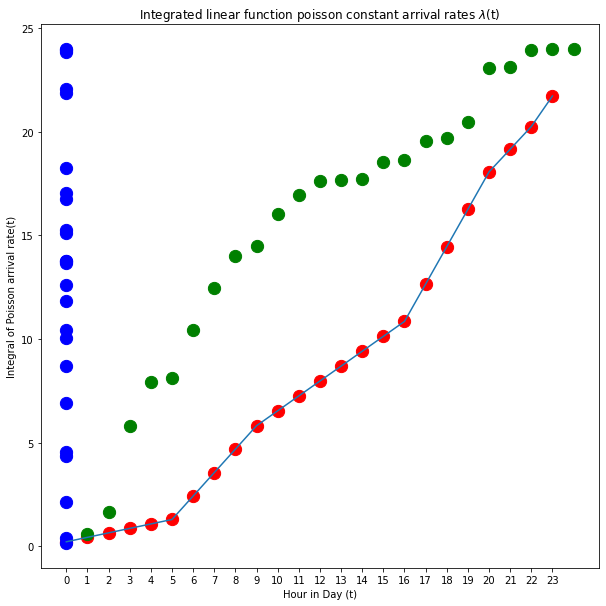

In [257]:
## Graph integral of poisson arrival non-stationary function lamda(t) wrt time t

plt.figure(figsize=(10,10))
plt.plot(vhrthin.index, vhrthin.vcumsum)
plt.title(r'Integrated linear function poisson constant arrival rates $\lambda$(t)')
plt.xlabel('Hour in Day (t)')
plt.ylabel(r'Integral of Poisson arrival rate(t)')
plt.xticks(np.arange(24))
plt.scatter(vhrthin.index,vhrthin.vcumsum,s=150,color='r', zorder=2)
plt.scatter(p_pts[:,0],p_pts[:,1],s=150,color='b', zorder=2)
plt.scatter(cus_pts[:,0],cus_pts[:,1],s=150,color='g', zorder=2)

In [258]:
vhrthin

,hr,poisson,hrtime,perhr,vcumsum
0,0,1.291667,0,0.215278,0.215278
1,1,1.291667,60,0.215278,0.430556
2,2,1.291667,120,0.215278,0.645833
3,3,1.291667,180,0.215278,0.861111
4,4,1.291667,240,0.215278,1.076389
5,5,1.291667,300,0.215278,1.291667
6,6,4.523810,360,1.130952,2.422619
7,7,4.523810,420,1.130952,3.553571
8,8,4.523810,480,1.130952,4.684524
9,9,4.523810,540,1.130952,5.815476
